<a href="https://colab.research.google.com/github/Jahan08/Amber-tutorial/blob/main/Mtb_MIC_data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 6.8 MB/s eta 0:00:00
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client


target serach for Mtb

In [ ]:
target = new_client.target
target_query = target.search('mycobacterium tuberculosis')
targets = pd.DataFrame.from_dict(target_query)
targets

cross_references                          organism  \
0                 []        Mycobacterium tuberculosis   
1                 []  Mycobacterium tuberculosis H37Rv   
2                 []  Mycobacterium tuberculosis H37Ra   
3                 []                     Mycobacterium   
4                 []        Mycobacterium tuberculosis   
..               ...                               ...   
117               []        Mycobacterium tuberculosis   
118               []        Mycobacterium tuberculosis   
119               []        Mycobacterium tuberculosis   
120               []        Mycobacterium tuberculosis   
121               []        Mycobacterium tuberculosis   

                                             pref_name  score  \
0                           Mycobacterium tuberculosis   27.0   
1                     Mycobacterium tuberculosis H37Rv   24.0   
2                     Mycobacterium tuberculosis H37Ra   24.0   
3                                        Mycobacterium   13.0   
4            PYRAZINAMIDASE/NICOTINAMIDAS PNCA (PZase)   13.0   
..                                                 ...    ...   
117                                       70S ribosome    7.0   
118                                       ATP synthase    7.0   
119                              Thioredoxin reductase    7.0   
120  ATP-dependent Clp protease ATP-binding subunit...    7.0   
121   1,4-dihydroxy-2-naphthoate octaprenyltransferase    7.0   

     species_group_flag target_chembl_id  \
0                 False        CHEMBL360   
1                 False    CHEMBL2111188   
2                 False    CHEMBL2366634   
3                  True     CHEMBL614981   
4                 False    CHEMBL1697663   
..                  ...              ...   
117               False    CHEMBL2363965   
118               False    CHEMBL2364166   
119               False    CHEMBL2390811   
120               False    CHEMBL4630874   
121               False    CHEMBL4879548   

                                     target_components  \
0                                                   []   
1                                                   []   
2                                                   []   
3                                                   []   
4    [{'accession': 'Q50575', 'component_descriptio...   
..                                                 ...   
117  [{'accession': 'P9WHE1', 'component_descriptio...   
118  [{'accession': 'P9WPU9', 'component_descriptio...   
119  [{'accession': 'P9WHH1', 'component_descriptio...   
120  [{'accession': 'P9WPC9', 'component_descriptio...   
121  [{'accession': 'P9WIP3', 'component_descriptio...   

                      target_type  tax_id  
0                        ORGANISM    1773  
1                        ORGANISM   83332  
2                        ORGANISM  419947  
3                        ORGANISM    1763  
4                  SINGLE PROTEIN    1773  
..                            ...     ...  
117  PROTEIN NUCLEIC-ACID COMPLEX    1773  
118               PROTEIN COMPLEX    1773  
119                SINGLE PROTEIN    1773  
120                SINGLE PROTEIN    1773  
121                SINGLE PROTEIN    1773  

[122 rows x 9 columns]

selecting the target

In [ ]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL360'

In [ ]:
activity = new_client.activity
SEL = activity.filter(target_chembl_id=selected_target)
df = pd.DataFrame.from_dict(SEL)
df

activity_comment  activity_id  \
0        Not Determined        31883   
1                  None        33041   
2                  None        33985   
3                  None        33986   
4                  None        34021   
...                 ...          ...   
169139             None     23311398   
169140             None     23311399   
169141             None     23311524   
169142             None     23311525   
169143             None     23311526   

                                      activity_properties assay_chembl_id  \
0                                                      []    CHEMBL752464   
1                                                      []    CHEMBL752463   
2                                                      []    CHEMBL749419   
3                                                      []    CHEMBL749419   
4                                                      []    CHEMBL715914   
...                                                   ...             ...   
169139                                                 []   CHEMBL4844138   
169140                                                 []   CHEMBL4844139   
169141  [{'comments': None, 'relation': '=', 'result_f...   CHEMBL4844154   
169142  [{'comments': None, 'relation': '=', 'result_f...   CHEMBL4844155   
169143  [{'comments': None, 'relation': '=', 'result_f...   CHEMBL4844155   

                                        assay_description assay_type  \
0       Antimycobacterial activity against Mycobacteri...          F   
1       Antimycobacterial activity against Mycobacteri...          F   
2       Minimum inhibitory concentration against Mycob...          F   
3       Minimum inhibitory concentration against Mycob...          F   
4       In vitro antibacterial activity of compound ag...          F   
...                                                   ...        ...   
169139  Antimycobacterial activity against multi drug-...          F   
169140  Antimycobacterial activity against rifampicin-...          F   
169141  In vivo antimycobacterial activity against Myc...          F   
169142  In vivo antimycobacterial activity against Myc...          F   
169143  In vivo antimycobacterial activity against Myc...          F   

       assay_variant_accession assay_variant_mutation bao_endpoint  \
0                         None                   None  BAO_0000201   
1                         None                   None  BAO_0000201   
2                         None                   None  BAO_0000179   
3                         None                   None  BAO_0000179   
4                         None                   None  BAO_0002146   
...                        ...                    ...          ...   
169139                    None                   None  BAO_0002146   
169140                    None                   None  BAO_0002146   
169141                    None                   None  BAO_0000181   
169142                    None                   None  BAO_0002146   
169143                    None                   None  BAO_0000179   

         bao_format  ...             target_organism  \
0       BAO_0000218  ...  Mycobacterium tuberculosis   
1       BAO_0000218  ...  Mycobacterium tuberculosis   
2       BAO_0000218  ...  Mycobacterium tuberculosis   
3       BAO_0000218  ...  Mycobacterium tuberculosis   
4       BAO_0000218  ...  Mycobacterium tuberculosis   
...             ...  ...                         ...   
169139  BAO_0000218  ...  Mycobacterium tuberculosis   
169140  BAO_0000218  ...  Mycobacterium tuberculosis   
169141  BAO_0000218  ...  Mycobacterium tuberculosis   
169142  BAO_0000218  ...  Mycobacterium tuberculosis   
169143  BAO_0000218  ...  Mycobacterium tuberculosis   

                  target_pref_name target_tax_id text_value  toid        type  \
0       Mycobacterium tuberculosis          1773       None  None  Inhibition   
1       Mycobacterium tuberculosis          1773       None 

Consider MIC as Bioactivity property

In [ ]:
df.to_csv('bioactivity_data_Mtb_raw_data.csv', index=False)

In [ ]:
import pandas as pd 
df = pd.read_csv('/content/bioactivity_data_Mtb_raw_data.csv', header = 0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,12,13,15,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="MIC")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df

activity_comment  activity_id  \
0                 None        34021   
1                 None        34115   
2                 None        36502   
3                 None        42561   
4                 None        44868   
...                ...          ...   
25964             None     23311396   
25965             None     23311397   
25966             None     23311398   
25967             None     23311399   
25968             None     23311525   

                                     activity_properties assay_chembl_id  \
0                                                     []    CHEMBL715914   
1                                                     []    CHEMBL715914   
2                                                     []    CHEMBL715914   
3                                                     []    CHEMBL715914   
4                                                     []    CHEMBL715914   
...                                                  ...             ...   
25964                                                 []   CHEMBL4844136   
25965                                                 []   CHEMBL4844137   
25966                                                 []   CHEMBL4844138   
25967                                                 []   CHEMBL4844139   
25968  [{'comments': None, 'relation': '=', 'result_f...   CHEMBL4844155   

                                       assay_description assay_type  \
0      In vitro antibacterial activity of compound ag...          F   
1      In vitro antibacterial activity of compound ag...          F   
2      In vitro antibacterial activity of compound ag...          F   
3      In vitro antibacterial activity of compound ag...          F   
4      In vitro antibacterial activity of compound ag...          F   
...                                                  ...        ...   
25964  Antimycobacterial activity against multi drug-...          F   
25965  Antimycobacterial activity against isoniazid-r...          F   
25966  Antimycobacterial activity against multi drug-...          F   
25967  Antimycobacterial activity against rifampicin-...          F   
25968  In vivo antimycobacterial activity against Myc...          F   

      assay_variant_accession assay_variant_mutation bao_endpoint  \
0                        None                   None  BAO_0002146   
1                        None                   None  BAO_0002146   
2                        None                   None  BAO_0002146   
3                        None                   None  BAO_0002146   
4                        None                   None  BAO_0002146   
...                       ...                    ...          ...   
25964                    None                   None  BAO_0002146   
25965                    None                   None  BAO_0002146   
25966                    None                   None  BAO_0002146   
25967                    None                   None  BAO_0002146   
25968                    None                   None  BAO_0002146   

        bao_format  ...             target_organism  \
0      BAO_0000218  ...  Mycobacterium tuberculosis   
1      BAO_0000218  ...  Mycobacterium tuberculosis   
2      BAO_0000218  ...  Mycobacterium tuberculosis   
3      BAO_0000218  ...  Mycobacterium tuberculosis   
4      BAO_0000218  ...  Mycobacterium tuberculosis   
...            ...  ...                         ...   
25964  BAO_0000218  ...  Mycobacterium tuberculosis   
25965  BAO_0000218  ...  Mycobacterium tuberculosis   
25966  BAO_0000218  ...  Mycobacterium tuberculosis   
25967  BAO_0000218  ...  Mycobacterium tuberculosis   
25968  BAO_0000218  ...  Mycobacterium tuberculosis   

                 target_pref_name target_tax_id text_value  toid type  \
0      Mycobacterium tuberculosis          1773       None  None  MIC   
1      Mycobacterium tuberculosis          1773       None  None  MIC   
2      Mycobacterium tuberculosis          1773       None  No

In [ ]:
df.to_csv('bioactivity_data_Mtb_MIC.csv', index=False)

In [ ]:
# considering nM unit for MIC
df = df[(df['standard_units'] == 'nM')]
len(df)

12340

In [ ]:
df.standard_type.unique()

array(['MIC'], dtype=object)

In [ ]:
df

activity_comment  activity_id  \
76                None       146062   
77                None       146063   
78                None       148504   
79                None       148505   
80                None       148506   
...                ...          ...   
25964             None     23311396   
25965             None     23311397   
25966             None     23311398   
25967             None     23311399   
25968             None     23311525   

                                     activity_properties assay_chembl_id  \
76                                                    []    CHEMBL751176   
77                                                    []    CHEMBL744028   
78                                                    []    CHEMBL751176   
79                                                    []    CHEMBL744028   
80                                                    []    CHEMBL751176   
...                                                  ...             ...   
25964                                                 []   CHEMBL4844136   
25965                                                 []   CHEMBL4844137   
25966                                                 []   CHEMBL4844138   
25967                                                 []   CHEMBL4844139   
25968  [{'comments': None, 'relation': '=', 'result_f...   CHEMBL4844155   

                                       assay_description assay_type  \
76     Compound was tested in vitro for growth inhibi...          F   
77     Compound was tested in vitro for growth inhibi...          F   
78     Compound was tested in vitro for growth inhibi...          F   
79     Compound was tested in vitro for growth inhibi...          F   
80     Compound was tested in vitro for growth inhibi...          F   
...                                                  ...        ...   
25964  Antimycobacterial activity against multi drug-...          F   
25965  Antimycobacterial activity against isoniazid-r...          F   
25966  Antimycobacterial activity against multi drug-...          F   
25967  Antimycobacterial activity against rifampicin-...          F   
25968  In vivo antimycobacterial activity against Myc...          F   

      assay_variant_accession assay_variant_mutation bao_endpoint  \
76                       None                   None  BAO_0002146   
77                       None                   None  BAO_0002146   
78                       None                   None  BAO_0002146   
79                       None                   None  BAO_0002146   
80                       None                   None  BAO_0002146   
...                       ...                    ...          ...   
25964                    None                   None  BAO_0002146   
25965                    None                   None  BAO_0002146   
25966                    None                   None  BAO_0002146   
25967                    None                   None  BAO_0002146   
25968                    None                   None  BAO_0002146   

        bao_format  ...             target_organism  \
76     BAO_0000218  ...  Mycobacterium tuberculosis   
77     BAO_0000218  ...  Mycobacterium tuberculosis   
78     BAO_0000218  ...  Mycobacterium tuberculosis   
79     BAO_0000218  ...  Mycobacterium tuberculosis   
80     BAO_0000218  ...  Mycobacterium tuberculosis   
...            ...  ...                         ...   
25964  BAO_0000218  ...  Mycobacterium tuberculosis   
25965  BAO_0000218  ...  Mycobacterium tuberculosis   
25966  BAO_0000218  ...  Mycobacterium tuberculosis   
25967  BAO_0000218  ...  Mycobacterium tuberculosis   
25968  BAO_0000218  ...  Mycobacterium tuberculosis   

                 target_pref_name target_tax_id text_value  toid type  units  \
76     Mycobacterium tuberculosis          1773       None  None  MIC     uM   
77     Mycobacterium tuberculosis          1773       None  None  MIC     uM   
78     Mycobacterium tuberculosis        

In [ ]:
df.to_csv('bioactivity_data_Mtb_MIC_nM.csv', index=False)

handling the missing data

In [ ]:
df = df[df.standard_value.notna()]
df = df[df.value.notna()]
df

activity_comment  activity_id  \
76                None       146062   
77                None       146063   
78                None       148504   
79                None       148505   
80                None       148506   
...                ...          ...   
25964             None     23311396   
25965             None     23311397   
25966             None     23311398   
25967             None     23311399   
25968             None     23311525   

                                     activity_properties assay_chembl_id  \
76                                                    []    CHEMBL751176   
77                                                    []    CHEMBL744028   
78                                                    []    CHEMBL751176   
79                                                    []    CHEMBL744028   
80                                                    []    CHEMBL751176   
...                                                  ...             ...   
25964                                                 []   CHEMBL4844136   
25965                                                 []   CHEMBL4844137   
25966                                                 []   CHEMBL4844138   
25967                                                 []   CHEMBL4844139   
25968  [{'comments': None, 'relation': '=', 'result_f...   CHEMBL4844155   

                                       assay_description assay_type  \
76     Compound was tested in vitro for growth inhibi...          F   
77     Compound was tested in vitro for growth inhibi...          F   
78     Compound was tested in vitro for growth inhibi...          F   
79     Compound was tested in vitro for growth inhibi...          F   
80     Compound was tested in vitro for growth inhibi...          F   
...                                                  ...        ...   
25964  Antimycobacterial activity against multi drug-...          F   
25965  Antimycobacterial activity against isoniazid-r...          F   
25966  Antimycobacterial activity against multi drug-...          F   
25967  Antimycobacterial activity against rifampicin-...          F   
25968  In vivo antimycobacterial activity against Myc...          F   

      assay_variant_accession assay_variant_mutation bao_endpoint  \
76                       None                   None  BAO_0002146   
77                       None                   None  BAO_0002146   
78                       None                   None  BAO_0002146   
79                       None                   None  BAO_0002146   
80                       None                   None  BAO_0002146   
...                       ...                    ...          ...   
25964                    None                   None  BAO_0002146   
25965                    None                   None  BAO_0002146   
25966                    None                   None  BAO_0002146   
25967                    None                   None  BAO_0002146   
25968                    None                   None  BAO_0002146   

        bao_format  ...             target_organism  \
76     BAO_0000218  ...  Mycobacterium tuberculosis   
77     BAO_0000218  ...  Mycobacterium tuberculosis   
78     BAO_0000218  ...  Mycobacterium tuberculosis   
79     BAO_0000218  ...  Mycobacterium tuberculosis   
80     BAO_0000218  ...  Mycobacterium tuberculosis   
...            ...  ...                         ...   
25964  BAO_0000218  ...  Mycobacterium tuberculosis   
25965  BAO_0000218  ...  Mycobacterium tuberculosis   
25966  BAO_0000218  ...  Mycobacterium tuberculosis   
25967  BAO_0000218  ...  Mycobacterium tuberculosis   
25968  BAO_0000218  ...  Mycobacterium tuberculosis   

                 target_pref_name target_tax_id text_value  toid type  units  \
76     Mycobacterium tuberculosis          1773       None  None  MIC     uM   
77     Mycobacterium tuberculosis          1773       None  None  MIC     uM   
78     Mycobacterium tuberculosis        

In [ ]:
df = df[df.canonical_smiles.notna()]
df

activity_comment  activity_id  \
76                None       146062   
77                None       146063   
78                None       148504   
79                None       148505   
80                None       148506   
...                ...          ...   
25964             None     23311396   
25965             None     23311397   
25966             None     23311398   
25967             None     23311399   
25968             None     23311525   

                                     activity_properties assay_chembl_id  \
76                                                    []    CHEMBL751176   
77                                                    []    CHEMBL744028   
78                                                    []    CHEMBL751176   
79                                                    []    CHEMBL744028   
80                                                    []    CHEMBL751176   
...                                                  ...             ...   
25964                                                 []   CHEMBL4844136   
25965                                                 []   CHEMBL4844137   
25966                                                 []   CHEMBL4844138   
25967                                                 []   CHEMBL4844139   
25968  [{'comments': None, 'relation': '=', 'result_f...   CHEMBL4844155   

                                       assay_description assay_type  \
76     Compound was tested in vitro for growth inhibi...          F   
77     Compound was tested in vitro for growth inhibi...          F   
78     Compound was tested in vitro for growth inhibi...          F   
79     Compound was tested in vitro for growth inhibi...          F   
80     Compound was tested in vitro for growth inhibi...          F   
...                                                  ...        ...   
25964  Antimycobacterial activity against multi drug-...          F   
25965  Antimycobacterial activity against isoniazid-r...          F   
25966  Antimycobacterial activity against multi drug-...          F   
25967  Antimycobacterial activity against rifampicin-...          F   
25968  In vivo antimycobacterial activity against Myc...          F   

      assay_variant_accession assay_variant_mutation bao_endpoint  \
76                       None                   None  BAO_0002146   
77                       None                   None  BAO_0002146   
78                       None                   None  BAO_0002146   
79                       None                   None  BAO_0002146   
80                       None                   None  BAO_0002146   
...                       ...                    ...          ...   
25964                    None                   None  BAO_0002146   
25965                    None                   None  BAO_0002146   
25966                    None                   None  BAO_0002146   
25967                    None                   None  BAO_0002146   
25968                    None                   None  BAO_0002146   

        bao_format  ...             target_organism  \
76     BAO_0000218  ...  Mycobacterium tuberculosis   
77     BAO_0000218  ...  Mycobacterium tuberculosis   
78     BAO_0000218  ...  Mycobacterium tuberculosis   
79     BAO_0000218  ...  Mycobacterium tuberculosis   
80     BAO_0000218  ...  Mycobacterium tuberculosis   
...            ...  ...                         ...   
25964  BAO_0000218  ...  Mycobacterium tuberculosis   
25965  BAO_0000218  ...  Mycobacterium tuberculosis   
25966  BAO_0000218  ...  Mycobacterium tuberculosis   
25967  BAO_0000218  ...  Mycobacterium tuberculosis   
25968  BAO_0000218  ...  Mycobacterium tuberculosis   

                 target_pref_name target_tax_id text_value  toid type  units  \
76     Mycobacterium tuberculosis          1773       None  None  MIC     uM   
77     Mycobacterium tuberculosis          1773       None  None  MIC     uM   
78     Mycobacterium tuberculosis        

Define the activity

<=1000 nM active
rather inactive

In [ ]:
fix = []

for i in df.standard_value:
    fix.append(float(i))

In [ ]:
STATUS = []

for i in fix:
    if i <=10000:
        STATUS.append("Yes") #active
        
    elif i >=50000:
        STATUS.append("NO") #inactive
        
    else:
        STATUS.append("Intermediate") #intermediate

In [ ]:
df = df.drop('value', 1)
df['value'] = fix
df['Activity'] = STATUS
df.head(3)

<ipython-input-22-90299a80648f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('value', 1)


activity_comment  activity_id activity_properties assay_chembl_id  \
76             None       146062                  []    CHEMBL751176   
77             None       146063                  []    CHEMBL744028   
78             None       148504                  []    CHEMBL751176   

                                    assay_description assay_type  \
76  Compound was tested in vitro for growth inhibi...          F   
77  Compound was tested in vitro for growth inhibi...          F   
78  Compound was tested in vitro for growth inhibi...          F   

   assay_variant_accession assay_variant_mutation bao_endpoint   bao_format  \
76                    None                   None  BAO_0002146  BAO_0000218   
77                    None                   None  BAO_0002146  BAO_0000218   
78                    None                   None  BAO_0002146  BAO_0000218   

    ...            target_pref_name target_tax_id text_value  toid type units  \
76  ...  Mycobacterium tuberculosis          1773       None  None  MIC    uM   
77  ...  Mycobacterium tuberculosis          1773       None  None  MIC    uM   
78  ...  Mycobacterium tuberculosis          1773       None  None  MIC    uM   

      uo_units upper_value     value      Activity  
76  UO_0000065        None  572000.0            NO  
77  UO_0000065        None  572000.0            NO  
78  UO_0000065        None   33600.0  Intermediate  

[3 rows x 46 columns]

In [ ]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_type', 'standard_value', 'standard_units', 'Activity']
df2 = df[selection]
df2

molecule_chembl_id                                   canonical_smiles  \
76          CHEMBL169287                         OB1N=C(c2cnccn2)Nc2ccccc21   
77          CHEMBL169287                         OB1N=C(c2cnccn2)Nc2ccccc21   
78          CHEMBL168899                        O=C1Nc2ccccc2B(O)N1c1ccccc1   
79          CHEMBL168899                        O=C1Nc2ccccc2B(O)N1c1ccccc1   
80          CHEMBL435859                        OB1c2ccccc2N=C(S)N1c1cccnc1   
...                  ...                                                ...   
25964      CHEMBL4847217  CS(=O)(=O)NC(=O)CCc1cn(-c2ccc(Br)cc2)nc1-c1ccncc1   
25965      CHEMBL4847217  CS(=O)(=O)NC(=O)CCc1cn(-c2ccc(Br)cc2)nc1-c1ccncc1   
25966      CHEMBL4847217  CS(=O)(=O)NC(=O)CCc1cn(-c2ccc(Br)cc2)nc1-c1ccncc1   
25967      CHEMBL4847217  CS(=O)(=O)NC(=O)CCc1cn(-c2ccc(Br)cc2)nc1-c1ccncc1   
25968      CHEMBL4864647  CS(=O)(=O)NC(=O)CCc1cn(-c2ccc(Cl)cc2)nc1-c1ccc...   

      standard_type standard_value standard_units      Activity  
76              MIC       572000.0             nM            NO  
77              MIC       572000.0             nM            NO  
78              MIC        33600.0             nM  Intermediate  
79              MIC        67200.0             nM            NO  
80              MIC        31400.0             nM  Intermediate  
...             ...            ...            ...           ...  
25964           MIC        30000.0             nM  Intermediate  
25965           MIC        30000.0             nM  Intermediate  
25966           MIC        60000.0             nM            NO  
25967           MIC        60000.0             nM            NO  
25968           MIC         9100.0             nM           Yes  

[12340 rows x 6 columns]

In [ ]:
df2.to_csv('bioactivity_preprocessed_data_Mtb_MIC_nM.csv', index=False)

In [ ]:

# find the duplicate and unique molecule_chembl_id
import pandas as pd

df_dup = pd.concat(g for _, 
                    g in df.groupby("molecule_chembl_id") 
                      if len(g) > 1)
df_non = df.loc[~df.index.isin(df_dup.index)]

print (str(len(df_non)), 
       str(len(df_dup)), 
       str(len(df_dup)+len(df_non)))

3641 8699 12340


In [ ]:
len(df_non), len(df_non['molecule_chembl_id'].unique())

(3641, 3641)

In [ ]:
df_dup

activity_comment  activity_id activity_properties assay_chembl_id  \
9970              None     11014824                  []   CHEMBL2091603   
10020             None     11014874                  []   CHEMBL2091604   
12622             None     15704164                  []   CHEMBL3615876   
7111              None      3191611                  []   CHEMBL1105177   
7116              None      3191625                  []   CHEMBL1105180   
...                ...          ...                 ...             ...   
6747              None      2923191                  []   CHEMBL1045847   
21559             None     19220086                  []   CHEMBL4394917   
21560             None     19220087                  []   CHEMBL4394918   
21561             None     19220088                  []   CHEMBL4394919   
21562             None     19220089                  []   CHEMBL4394920   

                                       assay_description assay_type  \
9970   Antimycobacterial activity against Mycobacteri...          F   
10020  Antimycobacterial activity against Mycobacteri...          F   
12622  Antimycobacterial activity against multidrug-r...          F   
7111   Antitubercular activity against Mycobacterium ...          F   
7116   Antitubercular activity against Mycobacterium ...          F   
...                                                  ...        ...   
6747   Antimycobacterial activity against multidrug-r...          F   
21559  Antimycobacterial activity against Mycobacteri...          F   
21560  Antimycobacterial activity against Mycobacteri...          F   
21561  Antimycobacterial activity against Mycobacteri...          F   
21562  Antimycobacterial activity against Mycobacteri...          F   

      assay_variant_accession assay_variant_mutation bao_endpoint  \
9970                     None                   None  BAO_0002146   
10020                    None                   None  BAO_0002146   
12622                    None                   None  BAO_0002146   
7111                     None                   None  BAO_0002146   
7116                     None                   None  BAO_0002146   
...                       ...                    ...          ...   
6747                     None                   None  BAO_0002146   
21559                    None                   None  BAO_0002146   
21560                    None                   None  BAO_0002146   
21561                    None                   None  BAO_0002146   
21562                    None                   None  BAO_0002146   

        bao_format  ...            target_pref_name target_tax_id text_value  \
9970   BAO_0000218  ...  Mycobacterium tuberculosis          1773       None   
10020  BAO_0000218  ...  Mycobacterium tuberculosis          1773       None   
12622  BAO_0000218  ...  Mycobacterium tuberculosis          1773       None   
7111   BAO_0000218  ...  Mycobacterium tuberculosis          1773       None   
7116   BAO_0000218  ...  Mycobacterium tuberculosis          1773       None   
...            ...  ...                         ...           ...        ...   
6747   BAO_0000218  ...  Mycobacterium tuberculosis          1773       None   
21559  BAO_0000218  ...  Mycobacterium tuberculosis          1773       None   
21560  BAO_0000218  ...  Mycobacterium tuberculosis          1773       None   
21561  BAO_0000218  ...  Mycobacterium tuberculosis          1773       None   
21562  BAO_0000218  ...  Mycobacterium tuberculosis          1773       None   

       toid type   units    uo_units upper_value     value      Activity  
9970   None  MIC  umol/L  UO_0000065        None    4000.0           Yes  
10020  None  MIC  umol/L  UO_0000065        None    8000.0           Yes  
12622  None  MIC      uM  UO_0000065        None    1600.0           Yes  
7111   None  MIC      uM  UO_0000065        None  195300.0            NO  
7116   None  MIC      uM  UO_0000065        None  195300.0            NO  
...     ... 

In [ ]:
# mean and std of all duplicate
import numpy as np
import pandas as pd
from time import time

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

mean_std = df_dup.groupby(['molecule_chembl_id'], as_index=False).agg({'value':['mean', 'std']})
mean_std.head()

molecule_chembl_id          value             
                               mean          std
0       CHEMBL100633    4533.333333  3233.161507
1       CHEMBL105310  195300.000000     0.000000
2      CHEMBL1077904    3720.000000  1753.624817
3      CHEMBL1077914    6090.000000  3719.381669
4      CHEMBL1078007    8340.000000  4808.326112

In [ ]:
len(mean_std)

2119

In [ ]:
df_dup = df_dup.merge(mean_std, on='molecule_chembl_id', how='inner')
len(df_dup)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


8699

In [ ]:
#keep only SD less thab 2SD for duplicate chemblID

df_dup = df_dup[(df_dup[('value', 'std')] < 2)]
len(df_dup), len(df_dup['molecule_chembl_id'].unique())

(1713, 689)

In [ ]:
df_dup['select'] = (df_dup['value']- df_dup[('value', 'mean')]).abs()
#value_median = keep.groupby('chemblId')['value'].transform('median')

df_dup = df_dup.groupby(["molecule_chembl_id"]).apply(lambda x: x.sort_values(["select"], ascending = True)).reset_index(drop=True)
df_dup

activity_comment  activity_id activity_properties assay_chembl_id  \
0                None      3191611                  []   CHEMBL1105177   
1                None      3191625                  []   CHEMBL1105180   
2                None      3213108                  []   CHEMBL1116558   
3                None      3213109                  []   CHEMBL1104916   
4                None      3213086                  []   CHEMBL1116558   
...               ...          ...                 ...             ...   
1708             None      3078096                  []   CHEMBL1069202   
1709             None      3078067                  []   CHEMBL1069201   
1710             None      3078092                  []   CHEMBL1069202   
1711             None      3110923                  []   CHEMBL1071113   
1712             None      3110924                  []   CHEMBL1071114   

                                      assay_description assay_type  \
0     Antitubercular activity against Mycobacterium ...          F   
1     Antitubercular activity against Mycobacterium ...          F   
2     Antimycobacterial activity against Mycobacteri...          F   
3     Antimycobacterial activity against isoniazid-r...          F   
4     Antimycobacterial activity against Mycobacteri...          F   
...                                                 ...        ...   
1708  Antitubercular activity against multidrug-resi...          F   
1709  Antitubercular activity against Mycobacterium ...          F   
1710  Antitubercular activity against multidrug-resi...          F   
1711  Antimycobacterial activity against Mycobacteri...          F   
1712  Antimycobacterial activity against Mycobacteri...          F   

     assay_variant_accession assay_variant_mutation bao_endpoint   bao_format  \
0                       None                   None  BAO_0002146  BAO_0000218   
1                       None                   None  BAO_0002146  BAO_0000218   
2                       None                   None  BAO_0002146  BAO_0000218   
3                       None                   None  BAO_0002146  BAO_0000218   
4                       None                   None  BAO_0002146  BAO_0000218   
...                      ...                    ...          ...          ...   
1708                    None                   None  BAO_0002146  BAO_0000218   
1709                    None                   None  BAO_0002146  BAO_0000218   
1710                    None                   None  BAO_0002146  BAO_0000218   
1711                    None                   None  BAO_0002146  BAO_0000218   
1712                    None                   None  BAO_0002146  BAO_0000218   

      ...  toid type   units    uo_units upper_value     value  Activity  \
0     ...  None  MIC      uM  UO_0000065        None  195300.0        NO   
1     ...  None  MIC      uM  UO_0000065        None  195300.0        NO   
2     ...  None  MIC      uM  UO_0000065        None    6250.0       Yes   
3     ...  None  MIC      uM  UO_0000065        None    6250.0       Yes   
4     ...  None  MIC      uM  UO_0000065        None    6250.0       Yes   
...   ...   ...  ...     ...         ...         ...       ...       ...   
1708  ...  None  MIC      uM  UO_0000065        None    2600.0       Yes   
1709  ...  None  MIC      uM  UO_0000065        None    2800.0       Yes   
1710  ...  None  MIC      uM  UO_0000065        None    2800.0       Yes   
1711  ...  None  MIC  umol/L  UO_0000065        None    2000.0       Yes   
1712  ...  None  MIC  umol/L  UO_0000065        None    2000.0       Yes   

     (value, mean) (value, std) select  
0         195300.0          0.0    0.0  
1         195300.0          0.0    0.0  
2           6250.0          0.0    0.0  
3           6250.0          0.0    0.0  
4           6250.0          0.0    0.0  
...            ...          ...    ...  
1708        2600.0          0.0    0.0  
1709        2800.0          0.0    0.0  
1710        2800.0  

In [ ]:
df_dup = df_dup.drop_duplicates(subset='molecule_chembl_id', keep='first')
df_dup

activity_comment  activity_id activity_properties assay_chembl_id  \
0                None      3191611                  []   CHEMBL1105177   
2                None      3213108                  []   CHEMBL1116558   
4                None      3213086                  []   CHEMBL1116558   
6                None      3213094                  []   CHEMBL1116558   
8                None      3213096                  []   CHEMBL1116558   
...               ...          ...                 ...             ...   
1703             None      3112116                  []   CHEMBL1071113   
1705             None      3078080                  []   CHEMBL1069201   
1707             None      3078082                  []   CHEMBL1069201   
1709             None      3078067                  []   CHEMBL1069201   
1711             None      3110923                  []   CHEMBL1071113   

                                      assay_description assay_type  \
0     Antitubercular activity against Mycobacterium ...          F   
2     Antimycobacterial activity against Mycobacteri...          F   
4     Antimycobacterial activity against Mycobacteri...          F   
6     Antimycobacterial activity against Mycobacteri...          F   
8     Antimycobacterial activity against Mycobacteri...          F   
...                                                 ...        ...   
1703  Antimycobacterial activity against Mycobacteri...          F   
1705  Antitubercular activity against Mycobacterium ...          F   
1707  Antitubercular activity against Mycobacterium ...          F   
1709  Antitubercular activity against Mycobacterium ...          F   
1711  Antimycobacterial activity against Mycobacteri...          F   

     assay_variant_accession assay_variant_mutation bao_endpoint   bao_format  \
0                       None                   None  BAO_0002146  BAO_0000218   
2                       None                   None  BAO_0002146  BAO_0000218   
4                       None                   None  BAO_0002146  BAO_0000218   
6                       None                   None  BAO_0002146  BAO_0000218   
8                       None                   None  BAO_0002146  BAO_0000218   
...                      ...                    ...          ...          ...   
1703                    None                   None  BAO_0002146  BAO_0000218   
1705                    None                   None  BAO_0002146  BAO_0000218   
1707                    None                   None  BAO_0002146  BAO_0000218   
1709                    None                   None  BAO_0002146  BAO_0000218   
1711                    None                   None  BAO_0002146  BAO_0000218   

      ...  toid type   units    uo_units upper_value     value  Activity  \
0     ...  None  MIC      uM  UO_0000065        None  195300.0        NO   
2     ...  None  MIC      uM  UO_0000065        None    6250.0       Yes   
4     ...  None  MIC      uM  UO_0000065        None    6250.0       Yes   
6     ...  None  MIC      uM  UO_0000065        None    6250.0       Yes   
8     ...  None  MIC      uM  UO_0000065        None    6250.0       Yes   
...   ...   ...  ...     ...         ...         ...       ...       ...   
1703  ...  None  MIC  umol/L  UO_0000065        None    2000.0       Yes   
1705  ...  None  MIC      uM  UO_0000065        None    1400.0       Yes   
1707  ...  None  MIC      uM  UO_0000065        None    2600.0       Yes   
1709  ...  None  MIC      uM  UO_0000065        None    2800.0       Yes   
1711  ...  None  MIC  umol/L  UO_0000065        None    2000.0       Yes   

     (value, mean) (value, std) select  
0         195300.0          0.0    0.0  
2           6250.0          0.0    0.0  
4           6250.0          0.0    0.0  
6           6250.0          0.0    0.0  
8           6250.0          0.0    0.0  
...            ...          ...    ...  
1703        2000.0          0.0    0.0  
1705        1400.0          0.0    0.0  
1707        2600.0  

In [ ]:
len(df_dup), len(df_dup['molecule_chembl_id'].unique())

(689, 689)

In [ ]:
df_dup = df_dup.drop('select', 1)
df_dup = df_dup.drop(('value', 'mean'), 1)
df_dup = df_dup.drop(('value', 'std'), 1)

<ipython-input-36-aca2d7831475>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_dup = df_dup.drop('select', 1)
<ipython-input-36-aca2d7831475>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_dup = df_dup.drop(('value', 'mean'), 1)
<ipython-input-36-aca2d7831475>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_dup = df_dup.drop(('value', 'std'), 1)


In [ ]:
df_final = pd.concat([df_non, df_dup])
len(df_dup), len(df_non), len(df_final)

(689, 3641, 4330)

In [ ]:
df_final

activity_comment  activity_id activity_properties assay_chembl_id  \
132              None       223236                  []    CHEMBL858377   
136              None       224658                  []    CHEMBL858377   
138              None       225914                  []    CHEMBL858377   
140              None       229678                  []    CHEMBL858377   
142              None       232421                  []    CHEMBL858377   
...               ...          ...                 ...             ...   
1703             None      3112116                  []   CHEMBL1071113   
1705             None      3078080                  []   CHEMBL1069201   
1707             None      3078082                  []   CHEMBL1069201   
1709             None      3078067                  []   CHEMBL1069201   
1711             None      3110923                  []   CHEMBL1071113   

                                      assay_description assay_type  \
132   Minimum inhibitory concentration against Mycob...          F   
136   Minimum inhibitory concentration against Mycob...          F   
138   Minimum inhibitory concentration against Mycob...          F   
140   Minimum inhibitory concentration against Mycob...          F   
142   Minimum inhibitory concentration against Mycob...          F   
...                                                 ...        ...   
1703  Antimycobacterial activity against Mycobacteri...          F   
1705  Antitubercular activity against Mycobacterium ...          F   
1707  Antitubercular activity against Mycobacterium ...          F   
1709  Antitubercular activity against Mycobacterium ...          F   
1711  Antimycobacterial activity against Mycobacteri...          F   

     assay_variant_accession assay_variant_mutation bao_endpoint   bao_format  \
132                     None                   None  BAO_0002146  BAO_0000218   
136                     None                   None  BAO_0002146  BAO_0000218   
138                     None                   None  BAO_0002146  BAO_0000218   
140                     None                   None  BAO_0002146  BAO_0000218   
142                     None                   None  BAO_0002146  BAO_0000218   
...                      ...                    ...          ...          ...   
1703                    None                   None  BAO_0002146  BAO_0000218   
1705                    None                   None  BAO_0002146  BAO_0000218   
1707                    None                   None  BAO_0002146  BAO_0000218   
1709                    None                   None  BAO_0002146  BAO_0000218   
1711                    None                   None  BAO_0002146  BAO_0000218   

      ...            target_pref_name target_tax_id text_value  toid type  \
132   ...  Mycobacterium tuberculosis          1773       None  None  MIC   
136   ...  Mycobacterium tuberculosis          1773       None  None  MIC   
138   ...  Mycobacterium tuberculosis          1773       None  None  MIC   
140   ...  Mycobacterium tuberculosis          1773       None  None  MIC   
142   ...  Mycobacterium tuberculosis          1773       None  None  MIC   
...   ...                         ...           ...        ...   ...  ...   
1703  ...  Mycobacterium tuberculosis          1773       None  None  MIC   
1705  ...  Mycobacterium tuberculosis          1773       None  None  MIC   
1707  ...  Mycobacterium tuberculosis          1773       None  None  MIC   
1709  ...  Mycobacterium tuberculosis          1773       None  None  MIC   
1711  ...  Mycobacterium tuberculosis          1773       None  None  MIC   

       units    uo_units upper_value      value      Activity  
132       uM  UO_0000065        None    50000.0            NO  
136       uM  UO_0000065        None    25000.0  Intermediate  
138       uM  UO_0000065        None  1600000.0            NO  
140       uM  UO_0000065        None    50000.0            NO  
142       uM  UO_0000065        None   800000.0          

In [ ]:
df_final.to_csv('bioactivity_preprocessed_data_Mtb_nodup_MIC_nM.csv', index=False)

In [ ]:
df_final=pd.read_csv('/content/bioactivity_preprocessed_data_Mtb_nodup_MIC_nM.csv', header = 0)

In [ ]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'Activity']
df3 = df_final[selection]
df3

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL289596                               O=c1oc(-c2ccncc2)ns1   
1           CHEMBL38506                               O=c1oc(-c2cnccn2)ns1   
2           CHEMBL38498                                Sc1nc(-c2ccncc2)no1   
3          CHEMBL290241                    CC(C)(C)C(=O)OCn1nnnc1-c1cnccn1   
4          CHEMBL288494                                Oc1nc(-c2cnccn2)no1   
...                 ...                                                ...   
4325       CHEMBL605159          CCCCNC(=O)Oc1ccc(Cl)cc1C(=O)Nc1ccc(Cl)cc1   
4326       CHEMBL610479  CN1C/C(=C\c2ccc(F)cc2)C(=O)[C@]2(C1)[C@H](c1cc...   
4327       CHEMBL610759  CN1C/C(=C\c2ccccc2Cl)C(=O)[C@]2(C1)[C@H](c1ccc...   
4328       CHEMBL611042  CN1C/C(=C\c2ccc(F)cc2)C(=O)[C@]2(C1)[C@H](c1cc...   
4329       CHEMBL611667      CCCCCCCCNC(=O)Oc1ccc(Cl)cc1C(=O)Nc1cccc(Cl)c1   

      standard_value Activity  
0            50000.0       No  
1            25000.0       No  
2          1600000.0       No  
3            50000.0       No  
4           800000.0       No  
...              ...      ...  
4325          2000.0      Yes  
4326          1400.0      Yes  
4327          2600.0      Yes  
4328          2800.0      Yes  
4329          2000.0      Yes  

[4330 rows x 4 columns]

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-02-03 15:44:03--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   165MB/s    in 0.5s    

2023-02-03 15:44:04 (165 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

# Lipniski's Rule of 5


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd


Molecular Descriptors calculation

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df3.canonical_smiles)

In [ ]:
df_final2 = df_final.reset_index()
df_final2

index  activity_comment  activity_id activity_properties  \
0         0               NaN       223236                  []   
1         1               NaN       224658                  []   
2         2               NaN       225914                  []   
3         3               NaN       229678                  []   
4         4               NaN       232421                  []   
...     ...               ...          ...                 ...   
4325   4325               NaN      3112116                  []   
4326   4326               NaN      3078080                  []   
4327   4327               NaN      3078082                  []   
4328   4328               NaN      3078067                  []   
4329   4329               NaN      3110923                  []   

     assay_chembl_id                                  assay_description  \
0       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
1       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
2       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
3       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
4       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
...              ...                                                ...   
4325   CHEMBL1071113  Antimycobacterial activity against Mycobacteri...   
4326   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4327   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4328   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4329   CHEMBL1071113  Antimycobacterial activity against Mycobacteri...   

     assay_type  assay_variant_accession  assay_variant_mutation bao_endpoint  \
0             F                      NaN                     NaN  BAO_0002146   
1             F                      NaN                     NaN  BAO_0002146   
2             F                      NaN                     NaN  BAO_0002146   
3             F                      NaN                     NaN  BAO_0002146   
4             F                      NaN                     NaN  BAO_0002146   
...         ...                      ...                     ...          ...   
4325          F                      NaN                     NaN  BAO_0002146   
4326          F                      NaN                     NaN  BAO_0002146   
4327          F                      NaN                     NaN  BAO_0002146   
4328          F                      NaN                     NaN  BAO_0002146   
4329          F                      NaN                     NaN  BAO_0002146   

      ...            target_pref_name target_tax_id text_value toid type  \
0     ...  Mycobacterium tuberculosis          1773        NaN  NaN  MIC   
1     ...  Mycobacterium tuberculosis          1773        NaN  NaN  MIC   
2     ...  Mycobacterium tuberculosis          1773        NaN  NaN  MIC   
3     ...  Mycobacterium tuberculosis          1773        NaN  NaN  MIC   
4     ...  Mycobacterium tuberculosis          1773        NaN  NaN  MIC   
...   ...                         ...           ...        ...  ...  ...   
4325  ...  Mycobacterium tuberculosis          1773        NaN  NaN  MIC   
4326  ...  Mycobacterium tuberculosis          1773        NaN  NaN  MIC   
4327  ...  Mycobacterium tuberculosis          1773        NaN  NaN  MIC   
4328  ...  Mycobacterium tuberculosis          1773        NaN  NaN  MIC   
4329  ...  Mycobacterium tuberculosis          1773        NaN  NaN  MIC   

       units    uo_units  upper_value      value Activity  
0         uM  UO_0000065          NaN    50000.0       No  
1         uM  UO_0000065          NaN    25000.0       No  
2         uM  UO_0000065          NaN  1600000.0       No  
3         uM  UO_0000065          NaN    50000.0       No  
4         uM  UO_0000065          NaN   800000.0       No  
...      ...         ...          ...        ...      ...  
4325  

In [ ]:
df_lipinski

MW    LogP  NumHDonors  NumHAcceptors
0     180.188  1.1583         0.0            5.0
1     181.176  0.5533         0.0            6.0
2     179.204  1.4203         1.0            5.0
3     262.273  0.6769         0.0            8.0
4     164.124  0.2322         1.0            6.0
...       ...     ...         ...            ...
4325  381.259  5.1342         2.0            3.0
4326  588.636  4.7772         1.0            7.0
4327  621.546  5.8058         1.0            7.0
4328  578.084  5.5224         1.0            5.0
4329  437.367  6.6946         2.0            3.0

[4330 rows x 4 columns]

In [ ]:
df_combined = pd.concat([df_final2,df_lipinski], axis=1)

In [ ]:
df_combined

index  activity_comment  activity_id activity_properties  \
0         0               NaN       223236                  []   
1         1               NaN       224658                  []   
2         2               NaN       225914                  []   
3         3               NaN       229678                  []   
4         4               NaN       232421                  []   
...     ...               ...          ...                 ...   
4325   4325               NaN      3112116                  []   
4326   4326               NaN      3078080                  []   
4327   4327               NaN      3078082                  []   
4328   4328               NaN      3078067                  []   
4329   4329               NaN      3110923                  []   

     assay_chembl_id                                  assay_description  \
0       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
1       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
2       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
3       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
4       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
...              ...                                                ...   
4325   CHEMBL1071113  Antimycobacterial activity against Mycobacteri...   
4326   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4327   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4328   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4329   CHEMBL1071113  Antimycobacterial activity against Mycobacteri...   

     assay_type  assay_variant_accession  assay_variant_mutation bao_endpoint  \
0             F                      NaN                     NaN  BAO_0002146   
1             F                      NaN                     NaN  BAO_0002146   
2             F                      NaN                     NaN  BAO_0002146   
3             F                      NaN                     NaN  BAO_0002146   
4             F                      NaN                     NaN  BAO_0002146   
...         ...                      ...                     ...          ...   
4325          F                      NaN                     NaN  BAO_0002146   
4326          F                      NaN                     NaN  BAO_0002146   
4327          F                      NaN                     NaN  BAO_0002146   
4328          F                      NaN                     NaN  BAO_0002146   
4329          F                      NaN                     NaN  BAO_0002146   

      ... type   units    uo_units upper_value      value Activity       MW  \
0     ...  MIC      uM  UO_0000065         NaN    50000.0       No  180.188   
1     ...  MIC      uM  UO_0000065         NaN    25000.0       No  181.176   
2     ...  MIC      uM  UO_0000065         NaN  1600000.0       No  179.204   
3     ...  MIC      uM  UO_0000065         NaN    50000.0       No  262.273   
4     ...  MIC      uM  UO_0000065         NaN   800000.0       No  164.124   
...   ...  ...     ...         ...         ...        ...      ...      ...   
4325  ...  MIC  umol/L  UO_0000065         NaN     2000.0      Yes  381.259   
4326  ...  MIC      uM  UO_0000065         NaN     1400.0      Yes  588.636   
4327  ...  MIC      uM  UO_0000065         NaN     2600.0      Yes  621.546   
4328  ...  MIC      uM  UO_0000065         NaN     2800.0      Yes  578.084   
4329  ...  MIC  umol/L  UO_0000065         NaN     2000.0      Yes  437.367   

        LogP  NumHDonors NumHAcceptors  
0     1.1583         0.0           5.0  
1     0.5533         0.0           6.0  
2     1.4203         1.0           5.0  
3     0.6769         0.0           8.0  
4     0.2322         1.0           6.0  
...      ...         ...           ...  
4325  5.1342         2.0           3.0  
4326  4.7772         1.0           7.0  
4327  5.8058         

In [ ]:
df_combined.to_csv('Mtb_MIC_nm_MolDes.csv', sep=',' ,index=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8349390a0>]],
      dtype=object)

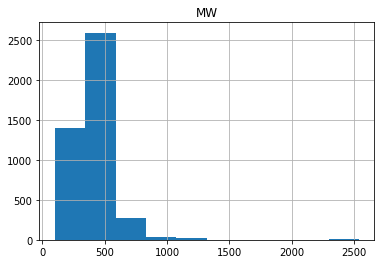

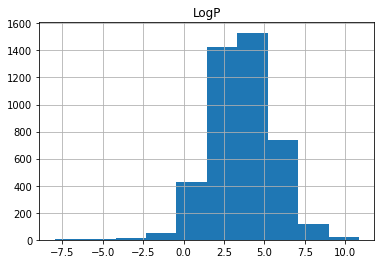

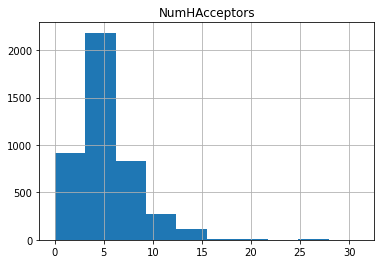

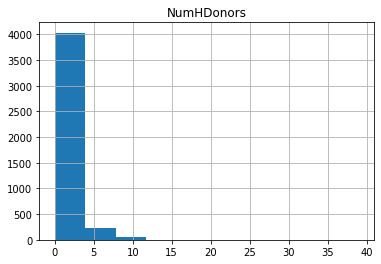

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd

#figure, ((plt1,plt2), (plt3,plt4)) = plt.subplots(2, 2)
#figure.set_size_inches(15,10)

# Histogram for MW
RO5 = pd.read_csv('/content/Mtb_MIC_nm_MolDes.csv', header = 0)

RO5.hist(column='MW')
RO5.hist(column='LogP')
RO5.hist(column='NumHAcceptors')
RO5.hist(column='NumHDonors')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


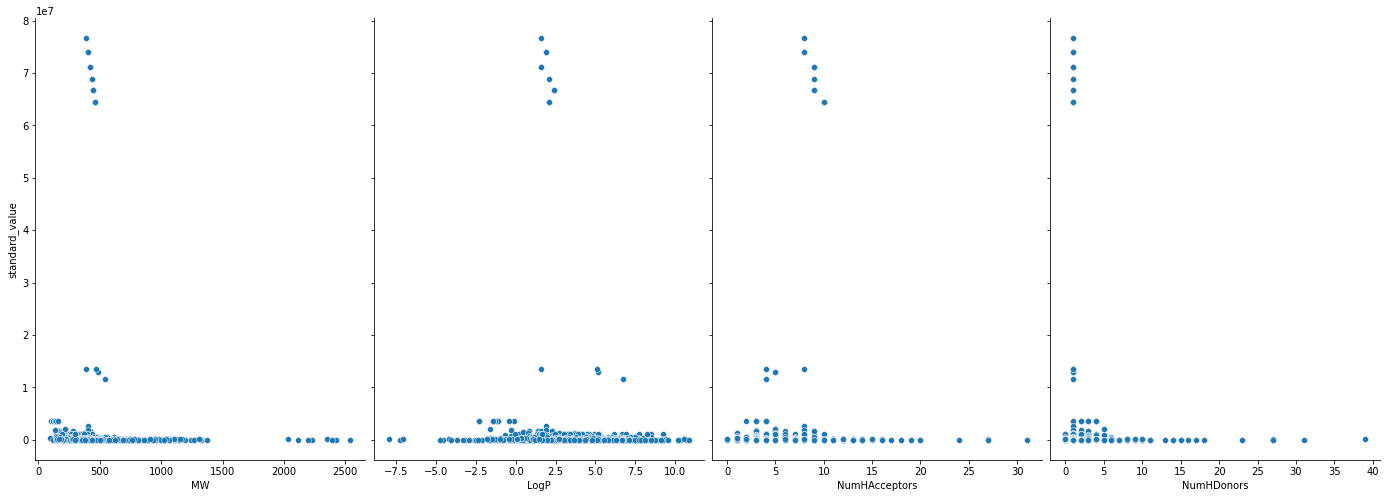

In [ ]:
import seaborn as sns
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_combined, x_vars=['MW','LogP','NumHAcceptors','NumHDonors'], y_vars='standard_value', size=7, aspect=0.7)

## Removing outliers

Not mendatory, here remving some compounds with beyond RO5 rules


In [ ]:
df_combined_new = df_combined[df_combined.MW.between(200, 1000, inclusive=True)  &
        df_combined.LogP.between(-5, 12, inclusive=True)   &
        df_combined.NumHAcceptors.between(0, 20, inclusive=True) &
        df_combined.NumHDonors.between(0, 20, inclusive=True)] # The inclusive (True: <=, False: <)

df_combined_new

<ipython-input-27-d9f8695ec17e>:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_combined_new = df_combined[df_combined.MW.between(200, 1000, inclusive=True)  &
<ipython-input-27-d9f8695ec17e>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_combined.LogP.between(-5, 12, inclusive=True)   &
<ipython-input-27-d9f8695ec17e>:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_combined.NumHAcceptors.between(0, 20, inclusive=True) &
<ipython-input-27-d9f8695ec17e>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_combined.NumHDonors.between(0, 20, inclusive=True)] # The inclusive (True: <=, False: <)


index  activity_comment  activity_id activity_properties  \
3         3               NaN       229678                  []   
5         5               NaN       236130                  []   
7         7               NaN       241502                  []   
9         9               NaN       248196                  []   
10       10               NaN       251034                  []   
...     ...               ...          ...                 ...   
4325   4325               NaN      3112116                  []   
4326   4326               NaN      3078080                  []   
4327   4327               NaN      3078082                  []   
4328   4328               NaN      3078067                  []   
4329   4329               NaN      3110923                  []   

     assay_chembl_id                                  assay_description  \
3       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
5       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
7       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
9       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
10      CHEMBL858377  Minimum inhibitory concentration against Mycob...   
...              ...                                                ...   
4325   CHEMBL1071113  Antimycobacterial activity against Mycobacteri...   
4326   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4327   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4328   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4329   CHEMBL1071113  Antimycobacterial activity against Mycobacteri...   

     assay_type  assay_variant_accession  assay_variant_mutation bao_endpoint  \
3             F                      NaN                     NaN  BAO_0002146   
5             F                      NaN                     NaN  BAO_0002146   
7             F                      NaN                     NaN  BAO_0002146   
9             F                      NaN                     NaN  BAO_0002146   
10            F                      NaN                     NaN  BAO_0002146   
...         ...                      ...                     ...          ...   
4325          F                      NaN                     NaN  BAO_0002146   
4326          F                      NaN                     NaN  BAO_0002146   
4327          F                      NaN                     NaN  BAO_0002146   
4328          F                      NaN                     NaN  BAO_0002146   
4329          F                      NaN                     NaN  BAO_0002146   

      ... type   units    uo_units upper_value     value Activity       MW  \
3     ...  MIC      uM  UO_0000065         NaN   50000.0       No  262.273   
5     ...  MIC      uM  UO_0000065         NaN  200000.0       No  293.348   
7     ...  MIC      uM  UO_0000065         NaN   50000.0       No  277.280   
9     ...  MIC      uM  UO_0000065         NaN  200000.0       No  293.348   
10    ...  MIC      uM  UO_0000065         NaN  200000.0       No  278.268   
...   ...  ...     ...         ...         ...       ...      ...      ...   
4325  ...  MIC  umol/L  UO_0000065         NaN    2000.0      Yes  381.259   
4326  ...  MIC      uM  UO_0000065         NaN    1400.0      Yes  588.636   
4327  ...  MIC      uM  UO_0000065         NaN    2600.0      Yes  621.546   
4328  ...  MIC      uM  UO_0000065         NaN    2800.0      Yes  578.084   
4329  ...  MIC  umol/L  UO_0000065         NaN    2000.0      Yes  437.367   

        LogP  NumHDonors NumHAcceptors  
3     0.6769         0.0           8.0  
5     2.7705         0.0           7.0  
7     1.4451         0.0           7.0  
9     2.7705         0.0           7.0  
10    0.8401         0.0           8.0  
...      ...         ...           ...  
4325  5.1342         2.0           3.0  
4326  4.7772         1.0           7.0  
4327  5.8058         1.0         

## Convert MIC to pMIC (negative logarithm of MIC)


In [ ]:
# to keep the value positive
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-28-48f767df5da0>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1)


index  activity_comment  activity_id activity_properties  \
0         0               NaN       223236                  []   
1         1               NaN       224658                  []   
2         2               NaN       225914                  []   
3         3               NaN       229678                  []   
4         4               NaN       232421                  []   
...     ...               ...          ...                 ...   
4325   4325               NaN      3112116                  []   
4326   4326               NaN      3078080                  []   
4327   4327               NaN      3078082                  []   
4328   4328               NaN      3078067                  []   
4329   4329               NaN      3110923                  []   

     assay_chembl_id                                  assay_description  \
0       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
1       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
2       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
3       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
4       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
...              ...                                                ...   
4325   CHEMBL1071113  Antimycobacterial activity against Mycobacteri...   
4326   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4327   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4328   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4329   CHEMBL1071113  Antimycobacterial activity against Mycobacteri...   

     assay_type  assay_variant_accession  assay_variant_mutation bao_endpoint  \
0             F                      NaN                     NaN  BAO_0002146   
1             F                      NaN                     NaN  BAO_0002146   
2             F                      NaN                     NaN  BAO_0002146   
3             F                      NaN                     NaN  BAO_0002146   
4             F                      NaN                     NaN  BAO_0002146   
...         ...                      ...                     ...          ...   
4325          F                      NaN                     NaN  BAO_0002146   
4326          F                      NaN                     NaN  BAO_0002146   
4327          F                      NaN                     NaN  BAO_0002146   
4328          F                      NaN                     NaN  BAO_0002146   
4329          F                      NaN                     NaN  BAO_0002146   

      ...   units    uo_units upper_value      value Activity       MW  \
0     ...      uM  UO_0000065         NaN    50000.0       No  180.188   
1     ...      uM  UO_0000065         NaN    25000.0       No  181.176   
2     ...      uM  UO_0000065         NaN  1600000.0       No  179.204   
3     ...      uM  UO_0000065         NaN    50000.0       No  262.273   
4     ...      uM  UO_0000065         NaN   800000.0       No  164.124   
...   ...     ...         ...         ...        ...      ...      ...   
4325  ...  umol/L  UO_0000065         NaN     2000.0      Yes  381.259   
4326  ...      uM  UO_0000065         NaN     1400.0      Yes  588.636   
4327  ...      uM  UO_0000065         NaN     2600.0      Yes  621.546   
4328  ...      uM  UO_0000065         NaN     2800.0      Yes  578.084   
4329  ...  umol/L  UO_0000065         NaN     2000.0      Yes  437.367   

        LogP  NumHDonors  NumHAcceptors value_norm  
0     1.1583         0.0            5.0    50000.0  
1     0.5533         0.0            6.0    25000.0  
2     1.4203         1.0            5.0  1600000.0  
3     0.6769         0.0            8.0    50000.0  
4     0.2322         1.0            6.0   800000.0  
...      ...         ...            ...        ...  
4325  5.1342         2.0            3.0     2000.0  
4326  4.7772         1.0  

In [ ]:

# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def MIC(input):
    pMIC = []

    for i in input['value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pMIC.append(-np.log10(molar))

    input['pMIC'] = pMIC
    x = input.drop('value_norm', 1)
        
    return x

In [ ]:
df_combined_2 = MIC(df_norm)
df_combined_2

<ipython-input-30-865b3a50bf5a>:10: RuntimeWarning: divide by zero encountered in log10
  pMIC.append(-np.log10(molar))
<ipython-input-30-865b3a50bf5a>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('value_norm', 1)


index  activity_comment  activity_id activity_properties  \
0         0               NaN       223236                  []   
1         1               NaN       224658                  []   
2         2               NaN       225914                  []   
3         3               NaN       229678                  []   
4         4               NaN       232421                  []   
...     ...               ...          ...                 ...   
4325   4325               NaN      3112116                  []   
4326   4326               NaN      3078080                  []   
4327   4327               NaN      3078082                  []   
4328   4328               NaN      3078067                  []   
4329   4329               NaN      3110923                  []   

     assay_chembl_id                                  assay_description  \
0       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
1       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
2       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
3       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
4       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
...              ...                                                ...   
4325   CHEMBL1071113  Antimycobacterial activity against Mycobacteri...   
4326   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4327   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4328   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4329   CHEMBL1071113  Antimycobacterial activity against Mycobacteri...   

     assay_type  assay_variant_accession  assay_variant_mutation bao_endpoint  \
0             F                      NaN                     NaN  BAO_0002146   
1             F                      NaN                     NaN  BAO_0002146   
2             F                      NaN                     NaN  BAO_0002146   
3             F                      NaN                     NaN  BAO_0002146   
4             F                      NaN                     NaN  BAO_0002146   
...         ...                      ...                     ...          ...   
4325          F                      NaN                     NaN  BAO_0002146   
4326          F                      NaN                     NaN  BAO_0002146   
4327          F                      NaN                     NaN  BAO_0002146   
4328          F                      NaN                     NaN  BAO_0002146   
4329          F                      NaN                     NaN  BAO_0002146   

      ...   units    uo_units upper_value      value Activity       MW  \
0     ...      uM  UO_0000065         NaN    50000.0       No  180.188   
1     ...      uM  UO_0000065         NaN    25000.0       No  181.176   
2     ...      uM  UO_0000065         NaN  1600000.0       No  179.204   
3     ...      uM  UO_0000065         NaN    50000.0       No  262.273   
4     ...      uM  UO_0000065         NaN   800000.0       No  164.124   
...   ...     ...         ...         ...        ...      ...      ...   
4325  ...  umol/L  UO_0000065         NaN     2000.0      Yes  381.259   
4326  ...      uM  UO_0000065         NaN     1400.0      Yes  588.636   
4327  ...      uM  UO_0000065         NaN     2600.0      Yes  621.546   
4328  ...      uM  UO_0000065         NaN     2800.0      Yes  578.084   
4329  ...  umol/L  UO_0000065         NaN     2000.0      Yes  437.367   

        LogP  NumHDonors  NumHAcceptors      pMIC  
0     1.1583         0.0            5.0  4.301030  
1     0.5533         0.0            6.0  4.602060  
2     1.4203         1.0            5.0  2.795880  
3     0.6769         0.0            8.0  4.301030  
4     0.2322         1.0            6.0  3.096910  
...      ...         ...            ...       ...  
4325  5.1342         2.0            3.0  5.698970  
4326  4.7772         1.0          

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


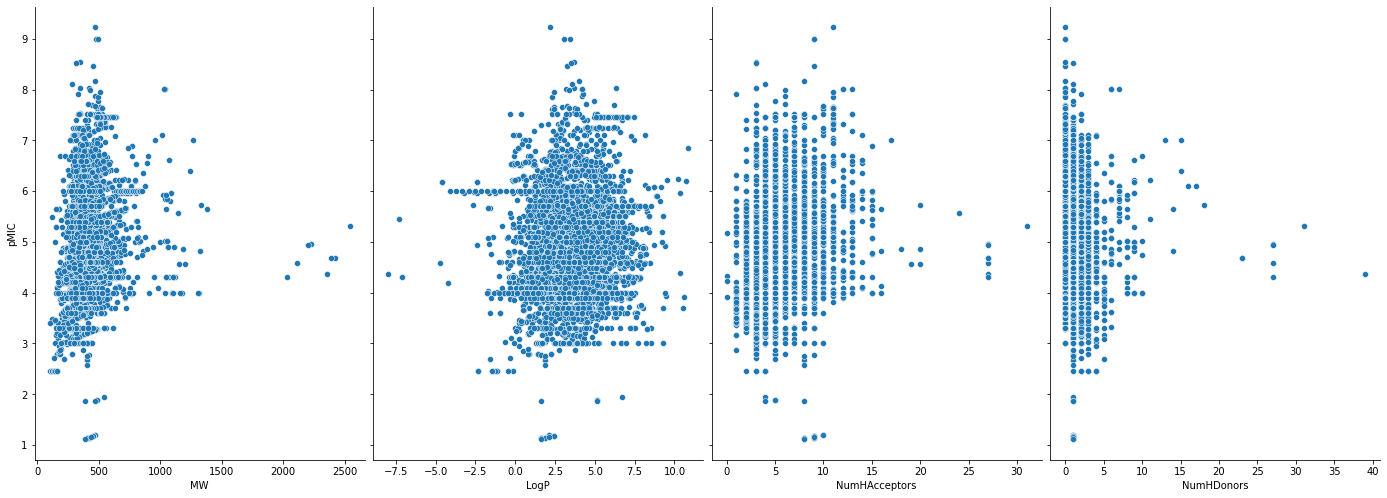

In [ ]:
sns.pairplot(df_combined_2, x_vars=['MW','LogP','NumHAcceptors','NumHDonors'], y_vars='pMIC', size=7, aspect=0.7)

## Removing the 'intermediate' bioactivity class

In [ ]:
df_combined_3 = df_combined_2[df_combined_2['Activity'] != 'intermediate']
df_combined_3

index  activity_comment  activity_id activity_properties  \
0         0               NaN       223236                  []   
1         1               NaN       224658                  []   
2         2               NaN       225914                  []   
3         3               NaN       229678                  []   
4         4               NaN       232421                  []   
...     ...               ...          ...                 ...   
4325   4325               NaN      3112116                  []   
4326   4326               NaN      3078080                  []   
4327   4327               NaN      3078082                  []   
4328   4328               NaN      3078067                  []   
4329   4329               NaN      3110923                  []   

     assay_chembl_id                                  assay_description  \
0       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
1       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
2       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
3       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
4       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
...              ...                                                ...   
4325   CHEMBL1071113  Antimycobacterial activity against Mycobacteri...   
4326   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4327   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4328   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4329   CHEMBL1071113  Antimycobacterial activity against Mycobacteri...   

     assay_type  assay_variant_accession  assay_variant_mutation bao_endpoint  \
0             F                      NaN                     NaN  BAO_0002146   
1             F                      NaN                     NaN  BAO_0002146   
2             F                      NaN                     NaN  BAO_0002146   
3             F                      NaN                     NaN  BAO_0002146   
4             F                      NaN                     NaN  BAO_0002146   
...         ...                      ...                     ...          ...   
4325          F                      NaN                     NaN  BAO_0002146   
4326          F                      NaN                     NaN  BAO_0002146   
4327          F                      NaN                     NaN  BAO_0002146   
4328          F                      NaN                     NaN  BAO_0002146   
4329          F                      NaN                     NaN  BAO_0002146   

      ...   units    uo_units upper_value      value Activity       MW  \
0     ...      uM  UO_0000065         NaN    50000.0       No  180.188   
1     ...      uM  UO_0000065         NaN    25000.0       No  181.176   
2     ...      uM  UO_0000065         NaN  1600000.0       No  179.204   
3     ...      uM  UO_0000065         NaN    50000.0       No  262.273   
4     ...      uM  UO_0000065         NaN   800000.0       No  164.124   
...   ...     ...         ...         ...        ...      ...      ...   
4325  ...  umol/L  UO_0000065         NaN     2000.0      Yes  381.259   
4326  ...      uM  UO_0000065         NaN     1400.0      Yes  588.636   
4327  ...      uM  UO_0000065         NaN     2600.0      Yes  621.546   
4328  ...      uM  UO_0000065         NaN     2800.0      Yes  578.084   
4329  ...  umol/L  UO_0000065         NaN     2000.0      Yes  437.367   

        LogP  NumHDonors  NumHAcceptors      pMIC  
0     1.1583         0.0            5.0  4.301030  
1     0.5533         0.0            6.0  4.602060  
2     1.4203         1.0            5.0  2.795880  
3     0.6769         0.0            8.0  4.301030  
4     0.2322         1.0            6.0  3.096910  
...      ...         ...            ...       ...  
4325  5.1342         2.0            3.0  5.698970  
4326  4.7772         1.0          

In [ ]:
df_combined_3.to_csv('Mtb_pMIC_MolDes_nM.csv', sep=',' ,index=False)

<ipython-input-39-567984e07189>:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


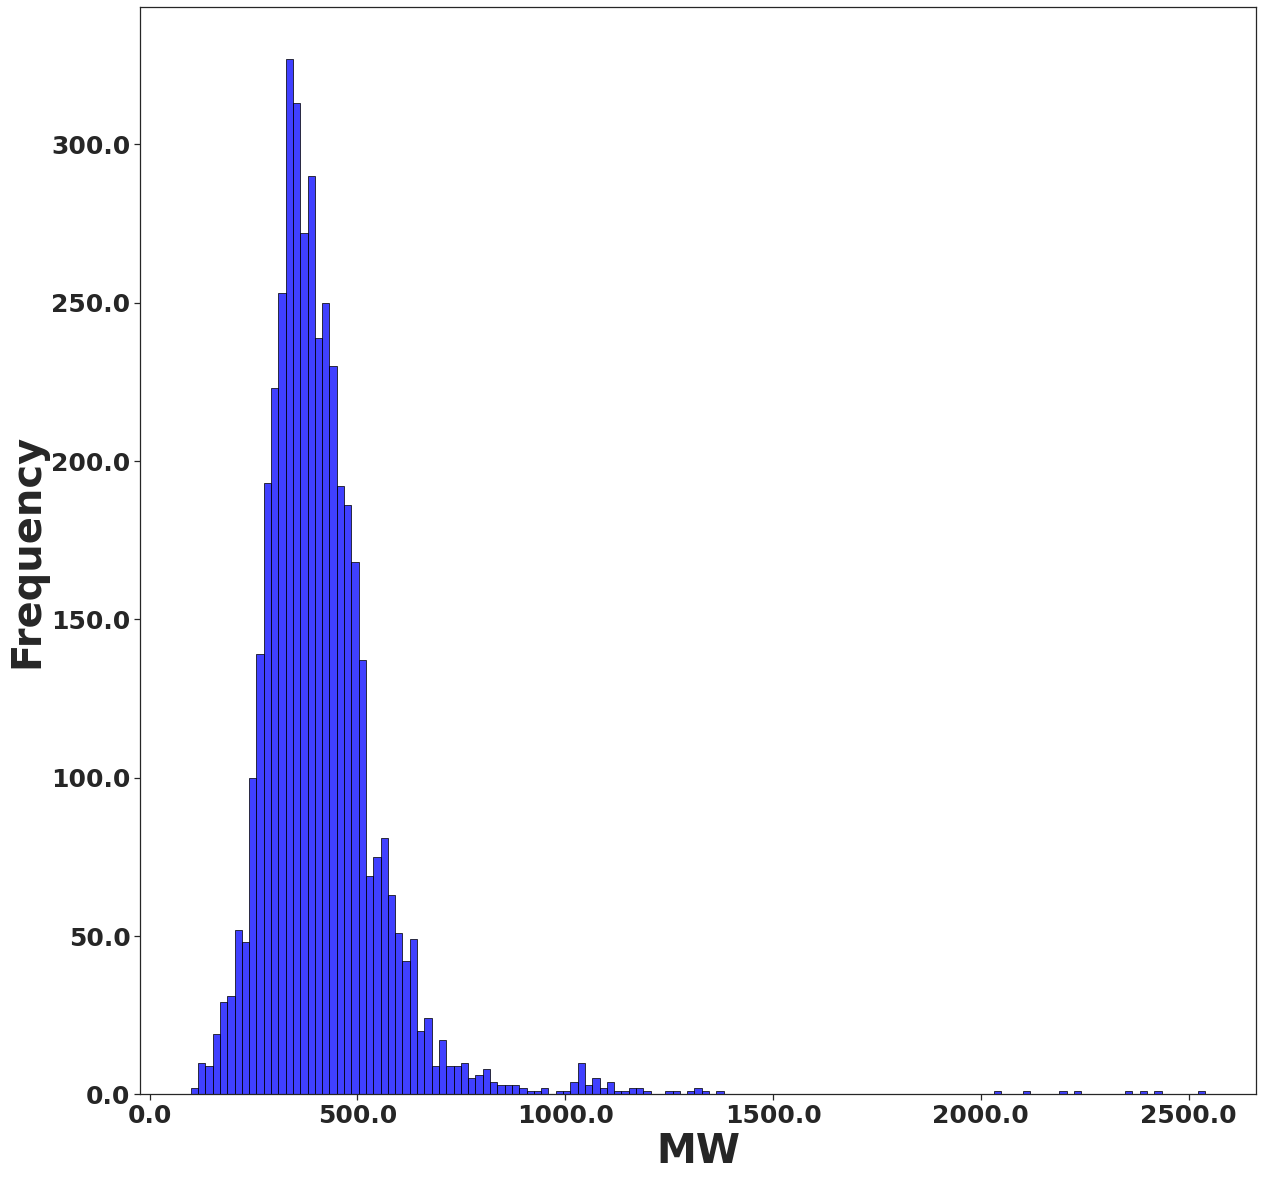

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import pandas.util.testing as tm



#Frequency plot of the 3 bioactivity classes

plt.figure(figsize=(20, 20))

b = sns.histplot(x='MW', data=df_combined_3, color= "blue", edgecolor='black')
b.set_yticklabels(b.get_yticks(), size = 25, fontweight='bold')
b.set_xticklabels(b.get_xticks(), size = 25, fontweight='bold')

plt.xlabel('MW', fontsize=40, fontweight='bold')
plt.ylabel('Frequency', fontsize=40, fontweight='bold')

plt.savefig('plot_MW_frequency.pdf', dpi=1200)

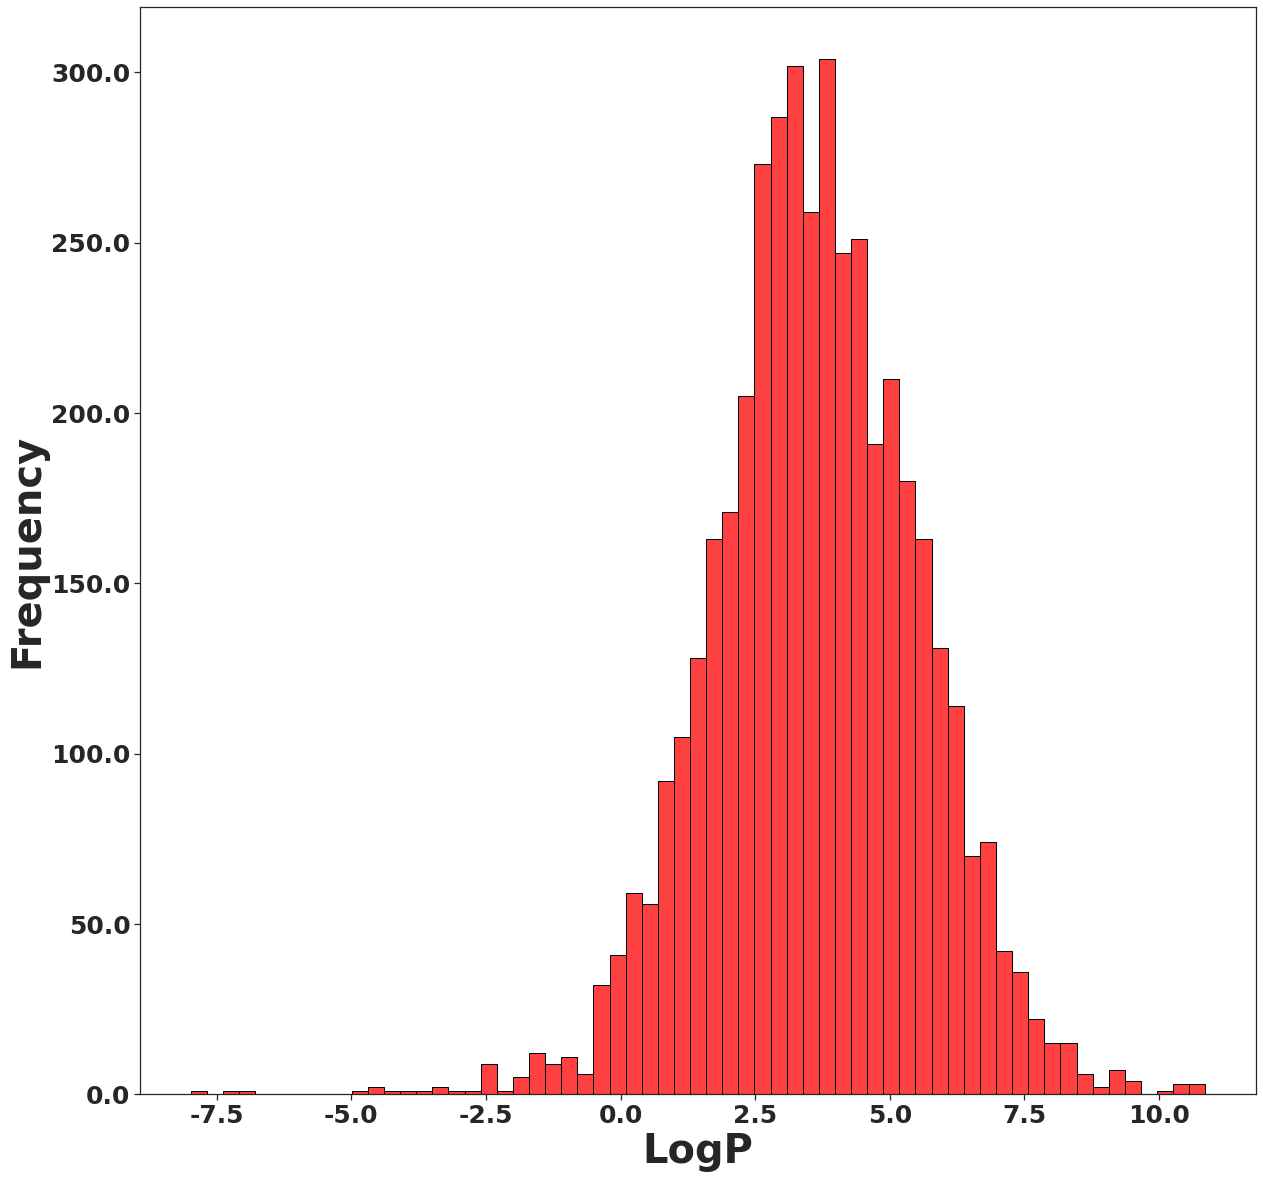

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import pandas.util.testing as tm



#Frequency plot of the 3 bioactivity classes

plt.figure(figsize=(20, 20))

b = sns.histplot(x='LogP', data=df_combined_3, color= "red", edgecolor='black')
b.set_yticklabels(b.get_yticks(), size = 25, fontweight='bold')
b.set_xticklabels(b.get_xticks(), size = 25, fontweight='bold')

plt.xlabel('LogP', fontsize=40, fontweight='bold')
plt.ylabel('Frequency', fontsize=40, fontweight='bold')

plt.savefig('plot_LogP_frequency.pdf', dpi=1200)

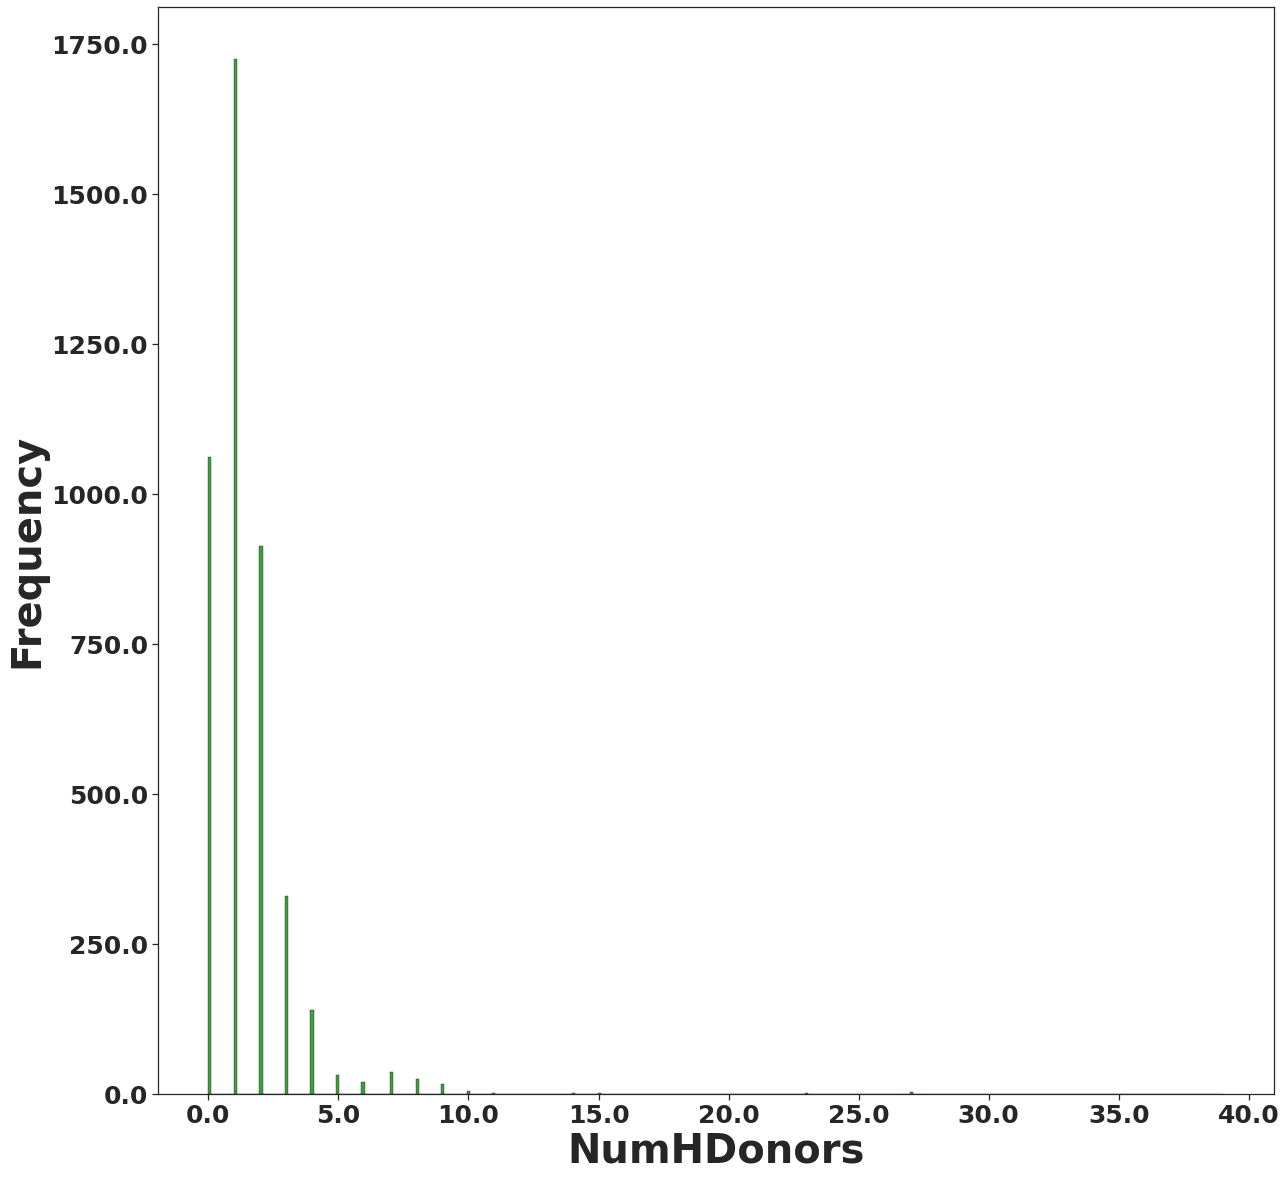

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import pandas.util.testing as tm



#Frequency plot of the 3 bioactivity classes

plt.figure(figsize=(20, 20))

b = sns.histplot(x='NumHDonors', data=df_combined_3, color= "green", edgecolor='black')
b.set_yticklabels(b.get_yticks(), size = 25, fontweight='bold')
b.set_xticklabels(b.get_xticks(), size = 25, fontweight='bold')

plt.xlabel('NumHDonors', fontsize=40, fontweight='bold')
plt.ylabel('Frequency', fontsize=40, fontweight='bold')

plt.savefig('plot_NumHDonors_frequency.pdf', dpi=1200)

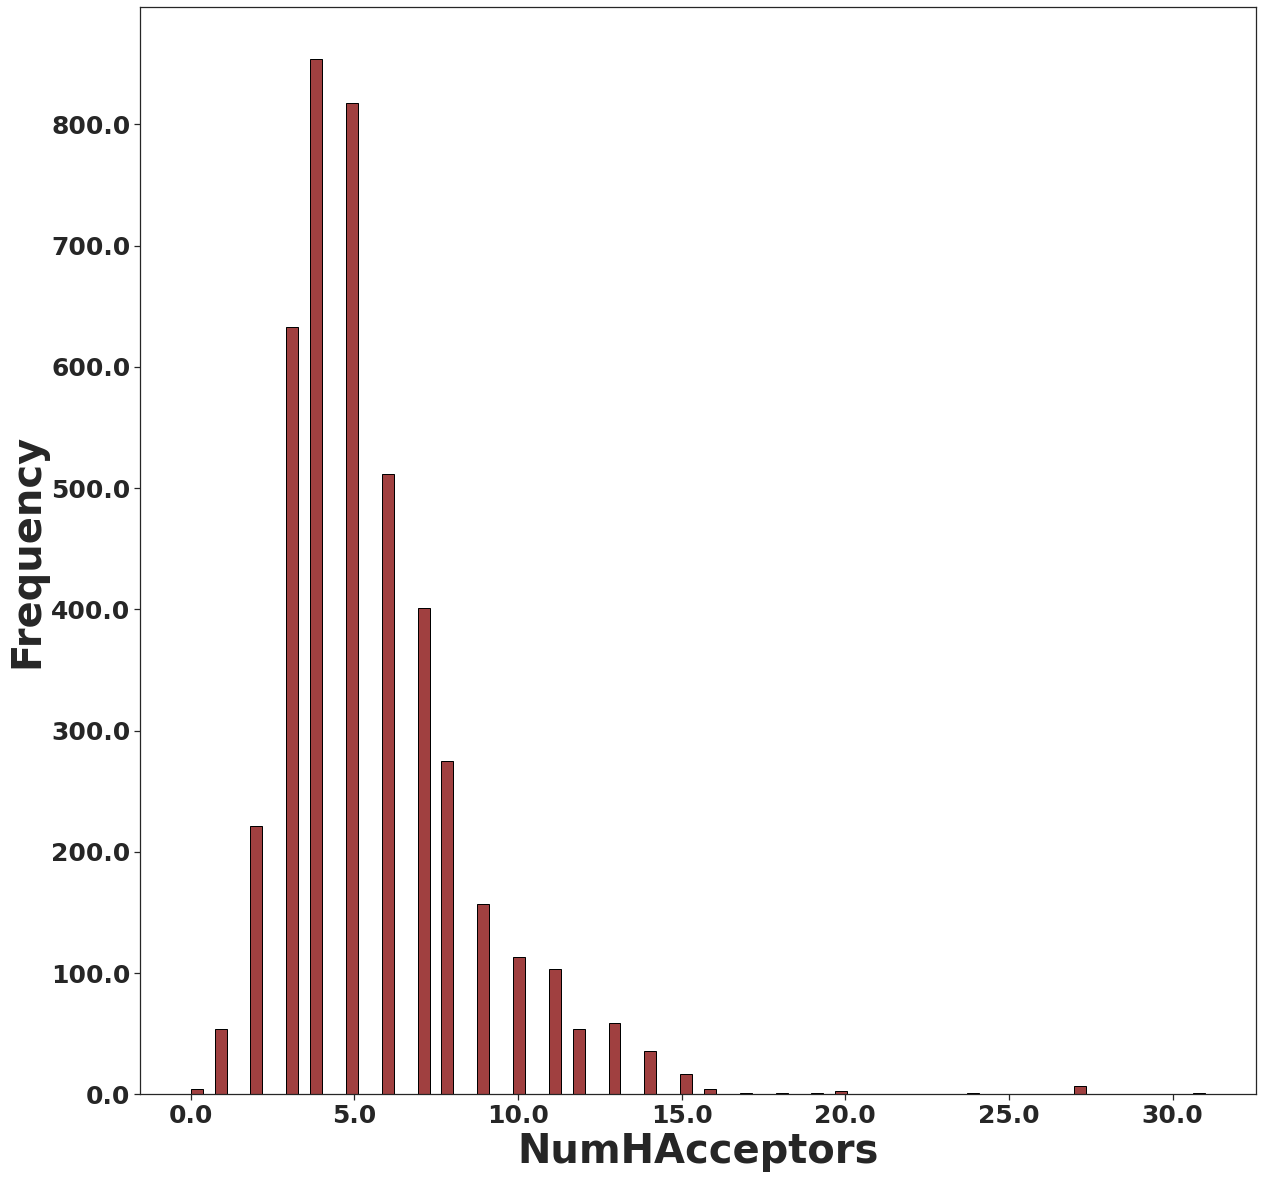

In [ ]:

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import pandas.util.testing as tm



#Frequency plot of the 3 bioactivity classes

plt.figure(figsize=(20, 20))

b = sns.histplot(x='NumHAcceptors', data=df_combined, color= "maroon", edgecolor='black')
b.set_yticklabels(b.get_yticks(), size = 25, fontweight='bold')
b.set_xticklabels(b.get_xticks(), size = 25, fontweight='bold')

plt.xlabel('NumHAcceptors', fontsize=40, fontweight='bold')
plt.ylabel('Frequency', fontsize=40, fontweight='bold')

plt.savefig('plot_NumHAccceptors_frequency.pdf', dpi=1200)

## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

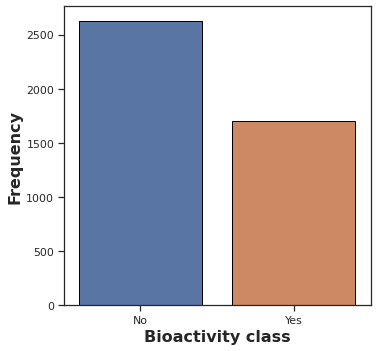

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import pandas.util.testing as tm



#Frequency plot of the 3 bioactivity classes

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='Activity', data=df_combined_3, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf', dpi=1200)
     

## Scatter plot of MW versus LogP

Scatter plot of MW versus LogP
It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

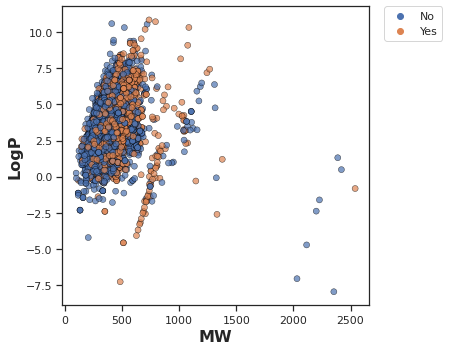

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_combined_3, hue='Activity', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=16, fontweight='bold')
plt.ylabel('LogP', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf', dpi=1200)

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


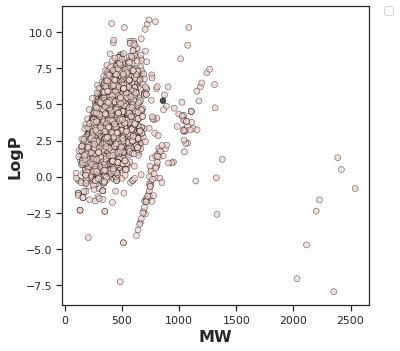

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_combined_3, hue='pMIC', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=16, fontweight='bold')
plt.ylabel('LogP', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf', dpi=1200)


## Box plots
pIC50 value




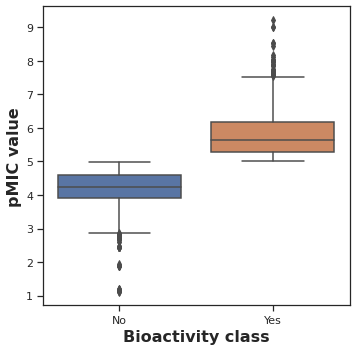

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity', y = 'pMIC', data = df_combined_3)

plt.xlabel('Bioactivity class', fontsize=16, fontweight='bold')
plt.ylabel('pMIC value', fontsize=16, fontweight='bold')

plt.savefig('plot_pMIC.pdf', dpi=1200)

### Statistical analysis | Mann-Whitney U test : Mann whiteny U test, is used to test wheteher two samples are likely to derive from the same population., the two populations have the same shape.

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'Activity']
  df = df_combined_3[selection]
  active = df[df.Activity == 'Yes']
  active = active[descriptor]

  selection = [descriptor, 'Activity']
  df = df_combined_3[selection]
  inactive = df[df.Activity == 'No']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results
     

In [ ]:
mannwhitney('pMIC')

Descriptor  Statistics    p  alpha                      Interpretation
0       pMIC   4471929.0  0.0   0.05  Different distribution (reject H0)

## MW

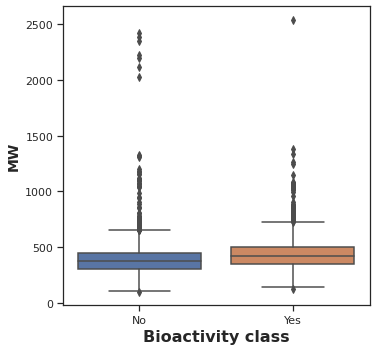

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity', y = 'MW', data = df_combined_3)

plt.xlabel('Bioactivity class', fontsize=16, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf', dpi=1200)

In [ ]:
mannwhitney('MW')

Descriptor  Statistics             p  alpha  \
0         MW   2829057.5  2.541331e-49   0.05   

                       Interpretation  
0  Different distribution (reject H0)

## LogP

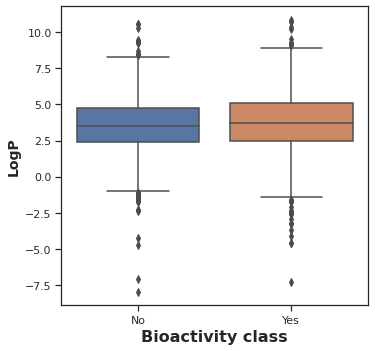

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity', y = 'LogP', data = df_combined_3)

plt.xlabel('Bioactivity class', fontsize=16, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf', dpi=1200)
     

In [ ]:
mannwhitney('LogP')

Descriptor  Statistics         p  alpha                      Interpretation
0       LogP   2340012.5  0.009601   0.05  Different distribution (reject H0)

## NumHDonors

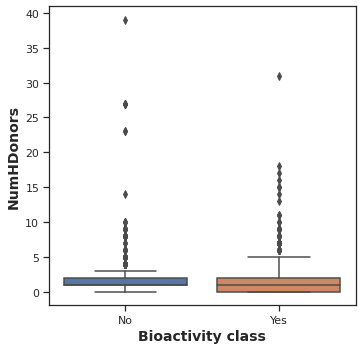

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity', y = 'NumHDonors', data = df_combined_3)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf', dpi=1200)

In [ ]:

mannwhitney('NumHDonors')

Descriptor  Statistics         p  alpha  \
0  NumHDonors   2307873.5  0.060891   0.05   

                          Interpretation  
0  Same distribution (fail to reject H0)

## NumAcceptors

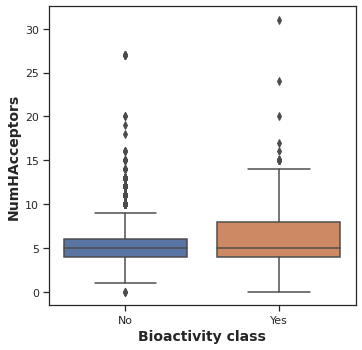

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Activity', y = 'NumHAcceptors', data = df_combined_3)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf', dpi=1200)

In [ ]:
mannwhitney('NumHAcceptors')

Descriptor  Statistics             p  alpha  \
0  NumHAcceptors   2643331.0  1.242901e-24   0.05   

                       Interpretation  
0  Different distribution (reject H0)

## Descriptor Calculation and Dataset Preparation

### Download PaDEL-Descriptor
Here we are going to use padel as software of molecular descriptor

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-02-03 16:35:04--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-02-03 16:35:05--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2023-02-03 16:35:06 (164 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-02-03 16:35:06--  https://gith

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

## Load bioactivity data
Download the curated ChEMBL bioactivity data that has been pre-processed. file that essentially contain the pMIC values that we will be using for building a regression model.

In [ ]:
import pandas as pd
df_combined_4 = pd.read_csv('/content/Mtb_pMIC_MolDes_nM.csv')     
df_combined_4

index  activity_comment  activity_id activity_properties  \
0         0               NaN       223236                  []   
1         1               NaN       224658                  []   
2         2               NaN       225914                  []   
3         3               NaN       229678                  []   
4         4               NaN       232421                  []   
...     ...               ...          ...                 ...   
4325   4325               NaN      3112116                  []   
4326   4326               NaN      3078080                  []   
4327   4327               NaN      3078082                  []   
4328   4328               NaN      3078067                  []   
4329   4329               NaN      3110923                  []   

     assay_chembl_id                                  assay_description  \
0       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
1       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
2       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
3       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
4       CHEMBL858377  Minimum inhibitory concentration against Mycob...   
...              ...                                                ...   
4325   CHEMBL1071113  Antimycobacterial activity against Mycobacteri...   
4326   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4327   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4328   CHEMBL1069201  Antitubercular activity against Mycobacterium ...   
4329   CHEMBL1071113  Antimycobacterial activity against Mycobacteri...   

     assay_type  assay_variant_accession  assay_variant_mutation bao_endpoint  \
0             F                      NaN                     NaN  BAO_0002146   
1             F                      NaN                     NaN  BAO_0002146   
2             F                      NaN                     NaN  BAO_0002146   
3             F                      NaN                     NaN  BAO_0002146   
4             F                      NaN                     NaN  BAO_0002146   
...         ...                      ...                     ...          ...   
4325          F                      NaN                     NaN  BAO_0002146   
4326          F                      NaN                     NaN  BAO_0002146   
4327          F                      NaN                     NaN  BAO_0002146   
4328          F                      NaN                     NaN  BAO_0002146   
4329          F                      NaN                     NaN  BAO_0002146   

      ...   units    uo_units upper_value      value Activity       MW  \
0     ...      uM  UO_0000065         NaN    50000.0       No  180.188   
1     ...      uM  UO_0000065         NaN    25000.0       No  181.176   
2     ...      uM  UO_0000065         NaN  1600000.0       No  179.204   
3     ...      uM  UO_0000065         NaN    50000.0       No  262.273   
4     ...      uM  UO_0000065         NaN   800000.0       No  164.124   
...   ...     ...         ...         ...        ...      ...      ...   
4325  ...  umol/L  UO_0000065         NaN     2000.0      Yes  381.259   
4326  ...      uM  UO_0000065         NaN     1400.0      Yes  588.636   
4327  ...      uM  UO_0000065         NaN     2600.0      Yes  621.546   
4328  ...      uM  UO_0000065         NaN     2800.0      Yes  578.084   
4329  ...  umol/L  UO_0000065         NaN     2000.0      Yes  437.367   

        LogP  NumHDonors  NumHAcceptors      pMIC  
0     1.1583         0.0            5.0  4.301030  
1     0.5533         0.0            6.0  4.602060  
2     1.4203         1.0            5.0  2.795880  
3     0.6769         0.0            8.0  4.301030  
4     0.2322         1.0            6.0  3.096910  
...      ...         ...            ...       ...  
4325  5.1342         2.0            3.0  5.698970  
4326  4.7772         1.0          

### molecular fingerprints**
The molecular fingerprint is a way to describe a molecular structure that can convert a molecular structure into a bit string. 
Since molecular fingerprint encodes the structure of a molecule, it is a 
useful method to describe the structural similarity among the 
molecules as a molecular descriptor
padel requires a specific file type with .sim  and it generally contains smiles and chembl id to 
compare the molecular fingerprints of our compounds with fingerprints database 
like pubchem fingerprints

In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_combined_4[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

O=c1oc(-c2ccncc2)ns1	CHEMBL289596
O=c1oc(-c2cnccn2)ns1	CHEMBL38506
Sc1nc(-c2ccncc2)no1	CHEMBL38498
CC(C)(C)C(=O)OCn1nnnc1-c1cnccn1	CHEMBL290241
Oc1nc(-c2cnccn2)no1	CHEMBL288494


## Calculate fingerprint descriptors

Calculate PaDEL descriptors

In [ ]:

! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


## PubChem FingerPrint

In [ ]:
! bash '/content/padel.sh'

Processing CHEMBL289596 in molecule.smi (1/4330). 
Processing CHEMBL38506 in molecule.smi (2/4330). 
Processing CHEMBL290241 in molecule.smi (4/4330). Average speed: 3.44 s/mol.
Processing CHEMBL38498 in molecule.smi (3/4330). Average speed: 6.81 s/mol.
Processing CHEMBL288494 in molecule.smi (5/4330). Average speed: 2.36 s/mol.
Processing CHEMBL43189 in molecule.smi (6/4330). Average speed: 1.83 s/mol.
Processing CHEMBL39060 in molecule.smi (7/4330). Average speed: 1.83 s/mol.
Processing CHEMBL40075 in molecule.smi (8/4330). Average speed: 1.27 s/mol.
Processing CHEMBL41760 in molecule.smi (10/4330). Average speed: 1.01 s/mol.
Processing CHEMBL290940 in molecule.smi (9/4330). Average speed: 1.13 s/mol.
Processing CHEMBL288372 in molecule.smi (11/4330). Average speed: 0.93 s/mol.
Processing CHEMBL38850 in molecule.smi (12/4330). Average speed: 0.86 s/mol.
Processing CHEMBL41650 in molecule.smi (13/4330). Average speed: 0.82 s/mol.
Processing CHEMBL287090 in molecule.smi (14/4330). Aver

## AtomPairs2DFingerprintCount

In [ ]:
! bash '/content/padel_AtomPairs2DFingerprintCount.sh'

Processing CHEMBL289596 in molecule.smi (1/4330). 
Processing CHEMBL38506 in molecule.smi (2/4330). 
Processing CHEMBL38498 in molecule.smi (3/4330). Average speed: 5.85 s/mol.
Processing CHEMBL290241 in molecule.smi (4/4330). Average speed: 2.96 s/mol.
Processing CHEMBL288494 in molecule.smi (5/4330). Average speed: 1.98 s/mol.
Processing CHEMBL43189 in molecule.smi (6/4330). Average speed: 1.50 s/mol.
Processing CHEMBL39060 in molecule.smi (7/4330). Average speed: 1.21 s/mol.
Processing CHEMBL40075 in molecule.smi (8/4330). Average speed: 1.03 s/mol.
Processing CHEMBL290940 in molecule.smi (9/4330). Average speed: 0.88 s/mol.
Processing CHEMBL41760 in molecule.smi (10/4330). Average speed: 0.78 s/mol.
Processing CHEMBL288372 in molecule.smi (11/4330). Average speed: 0.70 s/mol.
Processing CHEMBL41650 in molecule.smi (13/4330). Average speed: 0.58 s/mol.
Processing CHEMBL38850 in molecule.smi (12/4330). Average speed: 0.58 s/mol.
Processing CHEMBL287090 in molecule.smi (14/4330). Aver

## AtomPairs2DFingerprinter

In [ ]:
! bash '/content/padel_AtomPairs2DFingerprinter.sh'

Processing CHEMBL289596 in molecule.smi (1/4330). 
Processing CHEMBL38506 in molecule.smi (2/4330). 
Processing CHEMBL38498 in molecule.smi (3/4330). Average speed: 5.63 s/mol.
Processing CHEMBL290241 in molecule.smi (4/4330). Average speed: 2.82 s/mol.
Processing CHEMBL288494 in molecule.smi (5/4330). Average speed: 1.89 s/mol.
Processing CHEMBL43189 in molecule.smi (6/4330). Average speed: 1.43 s/mol.
Processing CHEMBL39060 in molecule.smi (7/4330). Average speed: 1.43 s/mol.
Processing CHEMBL40075 in molecule.smi (8/4330). Average speed: 0.96 s/mol.
Processing CHEMBL290940 in molecule.smi (9/4330). Average speed: 0.82 s/mol.
Processing CHEMBL41760 in molecule.smi (10/4330). Average speed: 0.72 s/mol.
Processing CHEMBL288372 in molecule.smi (11/4330). Average speed: 0.65 s/mol.
Processing CHEMBL38850 in molecule.smi (12/4330). Average speed: 0.59 s/mol.
Processing CHEMBL41650 in molecule.smi (13/4330). Average speed: 0.53 s/mol.
Processing CHEMBL287090 in molecule.smi (14/4330). Aver

## EStateFingerprinter

In [ ]:
! bash '/content/padel_EStateFingerprinter.sh'

Processing CHEMBL289596 in molecule.smi (1/4330). 
Processing CHEMBL38506 in molecule.smi (2/4330). 
Processing CHEMBL290241 in molecule.smi (4/4330). Average speed: 2.95 s/mol.
Processing CHEMBL38498 in molecule.smi (3/4330). Average speed: 5.90 s/mol.
Processing CHEMBL43189 in molecule.smi (6/4330). Average speed: 1.52 s/mol.
Processing CHEMBL288494 in molecule.smi (5/4330). Average speed: 2.01 s/mol.
Processing CHEMBL39060 in molecule.smi (7/4330). Average speed: 1.22 s/mol.
Processing CHEMBL40075 in molecule.smi (8/4330). Average speed: 1.03 s/mol.
Processing CHEMBL290940 in molecule.smi (9/4330). Average speed: 1.03 s/mol.
Processing CHEMBL41760 in molecule.smi (10/4330). Average speed: 0.78 s/mol.
Processing CHEMBL288372 in molecule.smi (11/4330). Average speed: 0.70 s/mol.
Processing CHEMBL38850 in molecule.smi (12/4330). Average speed: 0.63 s/mol.
Processing CHEMBL41650 in molecule.smi (13/4330). Average speed: 0.58 s/mol.
Processing CHEMBL287090 in molecule.smi (14/4330). Aver

## ExtendedFingerprinter

In [ ]:
! bash '/content/padel_ExtendedFingerprinter.sh'

Processing CHEMBL289596 in molecule.smi (1/4330). 
Processing CHEMBL38506 in molecule.smi (2/4330). 
Processing CHEMBL290241 in molecule.smi (4/4330). Average speed: 4.42 s/mol.
Processing CHEMBL38498 in molecule.smi (3/4330). Average speed: 8.84 s/mol.
Processing CHEMBL288494 in molecule.smi (5/4330). Average speed: 2.98 s/mol.
Processing CHEMBL39060 in molecule.smi (7/4330). Average speed: 2.26 s/mol.
Processing CHEMBL43189 in molecule.smi (6/4330). Average speed: 3.01 s/mol.
Processing CHEMBL40075 in molecule.smi (8/4330). Average speed: 1.52 s/mol.
Processing CHEMBL290940 in molecule.smi (9/4330). Average speed: 1.31 s/mol.
Processing CHEMBL288372 in molecule.smi (11/4330). Average speed: 1.15 s/mol.
Processing CHEMBL41760 in molecule.smi (10/4330). Average speed: 1.32 s/mol.
Processing CHEMBL38850 in molecule.smi (12/4330). Average speed: 0.94 s/mol.
Processing CHEMBL41650 in molecule.smi (13/4330). Average speed: 0.85 s/mol.
Processing CHEMBL287090 in molecule.smi (14/4330). Aver

## KlekotaRothFingerprintCount

In [ ]:
! bash '/content/padel_KlekotaRothFingerprintCount.sh'

Processing CHEMBL289596 in molecule.smi (1/4330). 
Processing CHEMBL38506 in molecule.smi (2/4330). 
Processing CHEMBL38498 in molecule.smi (3/4330). Average speed: 11.98 s/mol.
Processing CHEMBL290241 in molecule.smi (4/4330). Average speed: 6.66 s/mol.
Processing CHEMBL288494 in molecule.smi (5/4330). Average speed: 5.47 s/mol.
Processing CHEMBL43189 in molecule.smi (6/4330). Average speed: 4.32 s/mol.
Processing CHEMBL39060 in molecule.smi (7/4330). Average speed: 3.88 s/mol.
Processing CHEMBL40075 in molecule.smi (8/4330). Average speed: 3.59 s/mol.
Processing CHEMBL290940 in molecule.smi (9/4330). Average speed: 3.25 s/mol.
Processing CHEMBL41760 in molecule.smi (10/4330). Average speed: 3.04 s/mol.
Processing CHEMBL288372 in molecule.smi (11/4330). Average speed: 2.77 s/mol.
Processing CHEMBL38850 in molecule.smi (12/4330). Average speed: 2.68 s/mol.
Processing CHEMBL41650 in molecule.smi (13/4330). Average speed: 2.45 s/mol.
Processing CHEMBL287090 in molecule.smi (14/4330). Ave

## MACCSFingerprinter


In [ ]:
! bash '/content/padel_MACCSFingerprinter.sh'

Processing CHEMBL289596 in molecule.smi (1/4330). 
Processing CHEMBL38506 in molecule.smi (2/4330). 
Processing CHEMBL38498 in molecule.smi (3/4330). Average speed: 6.42 s/mol.
Processing CHEMBL290241 in molecule.smi (4/4330). Average speed: 3.23 s/mol.
Processing CHEMBL288494 in molecule.smi (5/4330). Average speed: 2.22 s/mol.
Processing CHEMBL43189 in molecule.smi (6/4330). Average speed: 1.69 s/mol.
Processing CHEMBL39060 in molecule.smi (7/4330). Average speed: 1.37 s/mol.
Processing CHEMBL40075 in molecule.smi (8/4330). Average speed: 1.18 s/mol.
Processing CHEMBL41760 in molecule.smi (10/4330). Average speed: 0.91 s/mol.
Processing CHEMBL290940 in molecule.smi (9/4330). Average speed: 1.01 s/mol.
Processing CHEMBL288372 in molecule.smi (11/4330). Average speed: 0.81 s/mol.
Processing CHEMBL38850 in molecule.smi (12/4330). Average speed: 0.76 s/mol.
Processing CHEMBL41650 in molecule.smi (13/4330). Average speed: 0.69 s/mol.
Processing CHEMBL287090 in molecule.smi (14/4330). Aver

## SubstructureFingerprintCount

In [ ]:
! bash '/content/padel_SubstructureFingerprintCount.sh'

Processing CHEMBL289596 in molecule.smi (1/4330). 
Processing CHEMBL38506 in molecule.smi (2/4330). 
Processing CHEMBL290241 in molecule.smi (4/4330). Average speed: 5.87 s/mol.
Processing CHEMBL38498 in molecule.smi (3/4330). Average speed: 5.87 s/mol.
Processing CHEMBL288494 in molecule.smi (5/4330). Average speed: 2.03 s/mol.
Processing CHEMBL43189 in molecule.smi (6/4330). Average speed: 1.55 s/mol.
Processing CHEMBL39060 in molecule.smi (7/4330). Average speed: 1.26 s/mol.
Processing CHEMBL40075 in molecule.smi (8/4330). Average speed: 1.08 s/mol.
Processing CHEMBL290940 in molecule.smi (9/4330). Average speed: 0.93 s/mol.
Processing CHEMBL41760 in molecule.smi (10/4330). Average speed: 0.95 s/mol.
Processing CHEMBL288372 in molecule.smi (11/4330). Average speed: 0.74 s/mol.
Processing CHEMBL38850 in molecule.smi (12/4330). Average speed: 0.69 s/mol.
Processing CHEMBL41650 in molecule.smi (13/4330). Average speed: 0.63 s/mol.
Processing CHEMBL287090 in molecule.smi (14/4330). Aver

## SubstructureFingerprinter

In [ ]:
! bash '/content/padel_SubstructureFingerprinter.sh'

Processing CHEMBL289596 in molecule.smi (1/4330). 
Processing CHEMBL38506 in molecule.smi (2/4330). 
Processing CHEMBL290241 in molecule.smi (4/4330). Average speed: 3.00 s/mol.
Processing CHEMBL38498 in molecule.smi (3/4330). Average speed: 6.00 s/mol.
Processing CHEMBL43189 in molecule.smi (6/4330). Average speed: 1.57 s/mol.
Processing CHEMBL288494 in molecule.smi (5/4330). Average speed: 2.07 s/mol.
Processing CHEMBL39060 in molecule.smi (7/4330). Average speed: 1.28 s/mol.
Processing CHEMBL290940 in molecule.smi (9/4330). Average speed: 0.94 s/mol.
Processing CHEMBL40075 in molecule.smi (8/4330). Average speed: 1.09 s/mol.
Processing CHEMBL41760 in molecule.smi (10/4330). Average speed: 0.84 s/mol.
Processing CHEMBL288372 in molecule.smi (11/4330). Average speed: 0.75 s/mol.
Processing CHEMBL38850 in molecule.smi (12/4330). Average speed: 0.70 s/mol.
Processing CHEMBL41650 in molecule.smi (13/4330). Average speed: 0.64 s/mol.
Processing CHEMBL291121 in molecule.smi (15/4330). Aver

## KlekotaRothFingerprinter

In [ ]:
# ! bash '/content/padel_KlekotaRothFingerprinter.sh'

## GraphOnlyFingerprinter

In [ ]:
!bash '/content/padel_GraphOnlyFingerprinter.sh'

Processing CHEMBL289596 in molecule.smi (1/4330). 
Processing CHEMBL38506 in molecule.smi (2/4330). 
Processing CHEMBL290241 in molecule.smi (4/4330). Average speed: 5.46 s/mol.
Processing CHEMBL38498 in molecule.smi (3/4330). Average speed: 5.42 s/mol.
Processing CHEMBL288494 in molecule.smi (5/4330). Average speed: 1.83 s/mol.
Processing CHEMBL39060 in molecule.smi (7/4330). Average speed: 1.39 s/mol.
Processing CHEMBL43189 in molecule.smi (6/4330). Average speed: 1.39 s/mol.
Processing CHEMBL40075 in molecule.smi (8/4330). Average speed: 0.93 s/mol.
Processing CHEMBL41760 in molecule.smi (10/4330). Average speed: 0.71 s/mol.
Processing CHEMBL290940 in molecule.smi (9/4330). Average speed: 0.80 s/mol.
Processing CHEMBL38850 in molecule.smi (12/4330). Average speed: 0.57 s/mol.
Processing CHEMBL288372 in molecule.smi (11/4330). Average speed: 0.63 s/mol.
Processing CHEMBL41650 in molecule.smi (13/4330). Average speed: 0.52 s/mol.
Processing CHEMBL287090 in molecule.smi (14/4330). Aver

## Fingerprinter

In [ ]:
! bash '/content/padel_Fingerprinter.sh'

Processing CHEMBL289596 in molecule.smi (1/4330). 
Processing CHEMBL38506 in molecule.smi (2/4330). 
Processing CHEMBL38498 in molecule.smi (3/4330). 
Processing CHEMBL290241 in molecule.smi (4/4330). Average speed: 5.95 s/mol.
Processing CHEMBL288494 in molecule.smi (5/4330). Average speed: 2.00 s/mol.
Processing CHEMBL39060 in molecule.smi (7/4330). Average speed: 1.51 s/mol.
Processing CHEMBL43189 in molecule.smi (6/4330). Average speed: 1.51 s/mol.
Processing CHEMBL40075 in molecule.smi (8/4330). Average speed: 1.02 s/mol.
Processing CHEMBL290940 in molecule.smi (9/4330). Average speed: 0.88 s/mol.
Processing CHEMBL41760 in molecule.smi (10/4330). Average speed: 0.77 s/mol.
Processing CHEMBL288372 in molecule.smi (11/4330). Average speed: 0.69 s/mol.
Processing CHEMBL38850 in molecule.smi (12/4330). Average speed: 0.62 s/mol.
Processing CHEMBL41650 in molecule.smi (13/4330). Average speed: 0.57 s/mol.
Processing CHEMBL287090 in molecule.smi (14/4330). Average speed: 0.52 s/mol.
Pro

## Preparing the X and Y Data Matrices

#### X data matrix

In [ ]:
df_pubchem_name = pd.read_csv('/content/descriptors_output_PubChemFP.csv')
df_pubchem_name

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0      CHEMBL38506           0           0           0           0   
1     CHEMBL289596           1           0           0           0   
2      CHEMBL38498           1           0           0           0   
3     CHEMBL288494           1           0           0           0   
4     CHEMBL290241           1           1           0           0   
...            ...         ...         ...         ...         ...   
4325  CHEMBL605159           1           1           1           0   
4326  CHEMBL610479           1           1           1           0   
4327  CHEMBL610759           1           1           1           0   
4328  CHEMBL611667           1           1           1           0   
4329  CHEMBL611042           1           1           1           0   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  \
0              0           0           0           0           0  ...   
1              0           0           0           0           0  ...   
2              0           0           0           0           0  ...   
3              0           0           0           0           0  ...   
4              0           0           0           0           0  ...   
...          ...         ...         ...         ...         ...  ...   
4325           0           0           0           0           0  ...   
4326           0           0           0           0           0  ...   
4327           0           0           0           0           0  ...   
4328           0           0           0           0           0  ...   
4329           0           0           0           0           0  ...   

      PubchemFP871  PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
4325             0             0             0             0             0   
4326             0             0             0             0             0   
4327             0             0             0             0             0   
4328             0             0             0             0             0   
4329             0             0             0             0             0   

      PubchemFP876  PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0                0             0             0             0             0  
1                0             0             0             0             0  
2                0             0             0             0             0  
3                0             0             0             0             0  
4                0             0             0             0             0  
...            ...           ...           ...           ...           ...  
4325             0             0             0             0             0  
4326             0             0             0             0             0  
4327             0             0             0             0             0  
4328             0             0             0             0             0  
4329             0             0             0             0             0  

[4330 rows x 882 columns]

In [ ]:
df_pubchem_X = df_pubchem_name.drop(columns=['Name'])
df_pubchem_X

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              0           0           0           0           0           0   
1              1           0           0           0           0           0   
2              1           0           0           0           0           0   
3              1           0           0           0           0           0   
4              1           1           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
4325           1           1           1           0           0           0   
4326           1           1           1           0           0           0   
4327           1           1           1           0           0           0   
4328           1           1           1           0           0           0   
4329           1           1           1           0           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP871  \
0              0           0           0           1  ...             0   
1              0           0           0           1  ...             0   
2              0           0           0           1  ...             0   
3              0           0           0           1  ...             0   
4              0           0           0           1  ...             0   
...          ...         ...         ...         ...  ...           ...   
4325           0           0           0           1  ...             0   
4326           0           0           0           1  ...             0   
4327           0           0           0           1  ...             0   
4328           0           0           0           1  ...             0   
4329           0           0           0           1  ...             0   

      PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
4325             0             0             0             0             0   
4326             0             0             0             0             0   
4327             0             0             0             0             0   
4328             0             0             0             0             0   
4329             0             0             0             0             0   

      PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0                0             0             0             0  
1                0             0             0             0  
2                0             0             0             0  
3                0             0             0             0  
4                0             0             0             0  
...            ...           ...           ...           ...  
4325             0             0             0             0  
4326             0             0             0             0  
4327             0             0             0             0  
4328             0             0             0             0  
4329             0             0             0             0  

[4330 rows x 881 columns]

## Y variable

In [ ]:
df_pubchem_Y = df_combined_4['pMIC']
df_pubchem_Y

0       4.301030
1       4.602060
2       2.795880
3       4.301030
4       3.096910
          ...   
4325    5.698970
4326    5.853872
4327    5.585027
4328    5.552842
4329    5.698970
Name: pMIC, Length: 4330, dtype: float64

## Combining X and Y variable

In [ ]:
dataset_pubchem = pd.concat([df_pubchem_X,df_pubchem_Y], axis=1)
dataset_pubchem

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              0           0           0           0           0           0   
1              1           0           0           0           0           0   
2              1           0           0           0           0           0   
3              1           0           0           0           0           0   
4              1           1           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
4325           1           1           1           0           0           0   
4326           1           1           1           0           0           0   
4327           1           1           1           0           0           0   
4328           1           1           1           0           0           0   
4329           1           1           1           0           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP872  \
0              0           0           0           1  ...             0   
1              0           0           0           1  ...             0   
2              0           0           0           1  ...             0   
3              0           0           0           1  ...             0   
4              0           0           0           1  ...             0   
...          ...         ...         ...         ...  ...           ...   
4325           0           0           0           1  ...             0   
4326           0           0           0           1  ...             0   
4327           0           0           0           1  ...             0   
4328           0           0           0           1  ...             0   
4329           0           0           0           1  ...             0   

      PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  PubchemFP877  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
4325             0             0             0             0             0   
4326             0             0             0             0             0   
4327             0             0             0             0             0   
4328             0             0             0             0             0   
4329             0             0             0             0             0   

      PubchemFP878  PubchemFP879  PubchemFP880      pMIC  
0                0             0             0  4.301030  
1                0             0             0  4.602060  
2                0             0             0  2.795880  
3                0             0             0  4.301030  
4                0             0             0  3.096910  
...            ...           ...           ...       ...  
4325             0             0             0  5.698970  
4326             0             0             0  5.853872  
4327             0             0             0  5.585027  
4328             0             0             0  5.552842  
4329             0             0             0  5.698970  

[4330 rows x 882 columns]

In [ ]:
dataset_pubchem.to_csv('Mtb_bioactivity_data_pMIC_pubchem_fp.csv', index=False)

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0      CHEMBL38506           0           0           0           0   
1     CHEMBL289596           1           0           0           0   
2      CHEMBL38498           1           0           0           0   
3     CHEMBL288494           1           0           0           0   
4     CHEMBL290241           1           1           0           0   
...            ...         ...         ...         ...         ...   
4325  CHEMBL605159           1           1           1           0   
4326  CHEMBL610479           1           1           1           0   
4327  CHEMBL610759           1           1           1           0   
4328  CHEMBL611667           1           1           1           0   
4329  CHEMBL611042           1           1           1           0   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  \
0              0           0           0           0           0  ...   
1              0           0           0           0           0  ...   
2              0           0           0           0           0  ...   
3              0           0           0           0           0  ...   
4              0           0           0           0           0  ...   
...          ...         ...         ...         ...         ...  ...   
4325           0           0           0           0           0  ...   
4326           0           0           0           0           0  ...   
4327           0           0           0           0           0  ...   
4328           0           0           0           0           0  ...   
4329           0           0           0           0           0  ...   

      PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
4325             0             0             0             0             0   
4326             0             0             0             0             0   
4327             0             0             0             0             0   
4328             0             0             0             0             0   
4329             0             0             0             0             0   

      PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880      pMIC  
0                0             0             0             0  4.301030  
1                0             0             0             0  4.602060  
2                0             0             0             0  2.795880  
3                0             0             0             0  4.301030  
4                0             0             0             0  3.096910  
...            ...           ...           ...           ...       ...  
4325             0             0             0             0  5.698970  
4326             0             0             0             0  5.853872  
4327             0             0             0             0  5.585027  
4328             0             0             0             0  5.552842  
4329             0             0             0             0  5.698970  

[4330 rows x 883 columns]

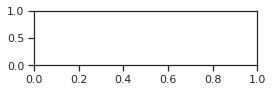

In [90]:
dataset_pubchem_name = pd.concat([df_pubchem_name,df_pubchem_Y], axis=1)
dataset_pubchem_name

In [92]:
dataset_pubchem_name.to_csv('Mtb_bioactivity_data_pMIC_pubchem_named.csv', index=False)

## Machine Learning Model

In [93]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [94]:
df_pubchem = pd.read_csv('/content/Mtb_bioactivity_data_MIC_pubchem_named.csv')
df_pubchem

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0      CHEMBL38506           0           0           0           0   
1     CHEMBL289596           1           0           0           0   
2      CHEMBL38498           1           0           0           0   
3     CHEMBL288494           1           0           0           0   
4     CHEMBL290241           1           1           0           0   
...            ...         ...         ...         ...         ...   
4325  CHEMBL605159           1           1           1           0   
4326  CHEMBL610479           1           1           1           0   
4327  CHEMBL610759           1           1           1           0   
4328  CHEMBL611667           1           1           1           0   
4329  CHEMBL611042           1           1           1           0   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  \
0              0           0           0           0           0  ...   
1              0           0           0           0           0  ...   
2              0           0           0           0           0  ...   
3              0           0           0           0           0  ...   
4              0           0           0           0           0  ...   
...          ...         ...         ...         ...         ...  ...   
4325           0           0           0           0           0  ...   
4326           0           0           0           0           0  ...   
4327           0           0           0           0           0  ...   
4328           0           0           0           0           0  ...   
4329           0           0           0           0           0  ...   

      PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
4325             0             0             0             0             0   
4326             0             0             0             0             0   
4327             0             0             0             0             0   
4328             0             0             0             0             0   
4329             0             0             0             0             0   

      PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880      pMIC  
0                0             0             0             0  4.301030  
1                0             0             0             0  4.602060  
2                0             0             0             0  2.795880  
3                0             0             0             0  4.301030  
4                0             0             0             0  3.096910  
...            ...           ...           ...           ...       ...  
4325             0             0             0             0  5.698970  
4326             0             0             0             0  5.853872  
4327             0             0             0             0  5.585027  
4328             0             0             0             0  5.552842  
4329             0             0             0             0  5.698970  

[4330 rows x 883 columns]

In [95]:
df_pubchem = df_pubchem.rename(columns = {'Name':'chemblId'})
df_pubchem

chemblId  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0      CHEMBL38506           0           0           0           0   
1     CHEMBL289596           1           0           0           0   
2      CHEMBL38498           1           0           0           0   
3     CHEMBL288494           1           0           0           0   
4     CHEMBL290241           1           1           0           0   
...            ...         ...         ...         ...         ...   
4325  CHEMBL605159           1           1           1           0   
4326  CHEMBL610479           1           1           1           0   
4327  CHEMBL610759           1           1           1           0   
4328  CHEMBL611667           1           1           1           0   
4329  CHEMBL611042           1           1           1           0   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  \
0              0           0           0           0           0  ...   
1              0           0           0           0           0  ...   
2              0           0           0           0           0  ...   
3              0           0           0           0           0  ...   
4              0           0           0           0           0  ...   
...          ...         ...         ...         ...         ...  ...   
4325           0           0           0           0           0  ...   
4326           0           0           0           0           0  ...   
4327           0           0           0           0           0  ...   
4328           0           0           0           0           0  ...   
4329           0           0           0           0           0  ...   

      PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
4325             0             0             0             0             0   
4326             0             0             0             0             0   
4327             0             0             0             0             0   
4328             0             0             0             0             0   
4329             0             0             0             0             0   

      PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880      pMIC  
0                0             0             0             0  4.301030  
1                0             0             0             0  4.602060  
2                0             0             0             0  2.795880  
3                0             0             0             0  4.301030  
4                0             0             0             0  3.096910  
...            ...           ...           ...           ...       ...  
4325             0             0             0             0  5.698970  
4326             0             0             0             0  5.853872  
4327             0             0             0             0  5.585027  
4328             0             0             0             0  5.552842  
4329             0             0             0             0  5.698970  

[4330 rows x 883 columns]

## Normalizing the Fetearues

In [96]:
df_pubchem_X= df_pubchem.drop(columns=['pMIC'])
df_pubchem_X

chemblId  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0      CHEMBL38506           0           0           0           0   
1     CHEMBL289596           1           0           0           0   
2      CHEMBL38498           1           0           0           0   
3     CHEMBL288494           1           0           0           0   
4     CHEMBL290241           1           1           0           0   
...            ...         ...         ...         ...         ...   
4325  CHEMBL605159           1           1           1           0   
4326  CHEMBL610479           1           1           1           0   
4327  CHEMBL610759           1           1           1           0   
4328  CHEMBL611667           1           1           1           0   
4329  CHEMBL611042           1           1           1           0   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  \
0              0           0           0           0           0  ...   
1              0           0           0           0           0  ...   
2              0           0           0           0           0  ...   
3              0           0           0           0           0  ...   
4              0           0           0           0           0  ...   
...          ...         ...         ...         ...         ...  ...   
4325           0           0           0           0           0  ...   
4326           0           0           0           0           0  ...   
4327           0           0           0           0           0  ...   
4328           0           0           0           0           0  ...   
4329           0           0           0           0           0  ...   

      PubchemFP871  PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
4325             0             0             0             0             0   
4326             0             0             0             0             0   
4327             0             0             0             0             0   
4328             0             0             0             0             0   
4329             0             0             0             0             0   

      PubchemFP876  PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0                0             0             0             0             0  
1                0             0             0             0             0  
2                0             0             0             0             0  
3                0             0             0             0             0  
4                0             0             0             0             0  
...            ...           ...           ...           ...           ...  
4325             0             0             0             0             0  
4326             0             0             0             0             0  
4327             0             0             0             0             0  
4328             0             0             0             0             0  
4329             0             0             0             0             0  

[4330 rows x 882 columns]

In [97]:
from sklearn import preprocessing

def normalized (Fp):
    
    chemblId = Fp.chemblId
    Fp_loc = Fp.iloc[:,1:]
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(Fp_loc)
    Fp_normalized = pd.DataFrame(np_scaled)
    Fp_normalized
    Fp_normalized = pd.DataFrame(np_scaled, columns=Fp_loc.columns)
    Fp_normalized['chemblId'] = chemblId
    
    return Fp_normalized

In [99]:
Fp_pubchem_normalized = normalized (df_pubchem_X)
Fp_pubchem_normalized.to_csv('pubchem_normalized.csv', sep=',' ,index=False)
Fp_pubchem_normalized

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0            0.0         0.0         0.0         0.0         0.0         0.0   
1            1.0         0.0         0.0         0.0         0.0         0.0   
2            1.0         0.0         0.0         0.0         0.0         0.0   
3            1.0         0.0         0.0         0.0         0.0         0.0   
4            1.0         1.0         0.0         0.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
4325         1.0         1.0         1.0         0.0         0.0         0.0   
4326         1.0         1.0         1.0         0.0         0.0         0.0   
4327         1.0         1.0         1.0         0.0         0.0         0.0   
4328         1.0         1.0         1.0         0.0         0.0         0.0   
4329         1.0         1.0         1.0         0.0         0.0         0.0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP872  \
0            0.0         0.0         0.0         0.0  ...           0.0   
1            0.0         0.0         0.0         0.0  ...           0.0   
2            0.0         0.0         0.0         0.0  ...           0.0   
3            0.0         0.0         0.0         0.0  ...           0.0   
4            0.0         0.0         0.0         0.0  ...           0.0   
...          ...         ...         ...         ...  ...           ...   
4325         0.0         0.0         0.0         0.0  ...           0.0   
4326         0.0         0.0         0.0         0.0  ...           0.0   
4327         0.0         0.0         0.0         0.0  ...           0.0   
4328         0.0         0.0         0.0         0.0  ...           0.0   
4329         0.0         0.0         0.0         0.0  ...           0.0   

      PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  PubchemFP877  \
0              0.0           0.0           0.0           0.0           0.0   
1              0.0           0.0           0.0           0.0           0.0   
2              0.0           0.0           0.0           0.0           0.0   
3              0.0           0.0           0.0           0.0           0.0   
4              0.0           0.0           0.0           0.0           0.0   
...            ...           ...           ...           ...           ...   
4325           0.0           0.0           0.0           0.0           0.0   
4326           0.0           0.0           0.0           0.0           0.0   
4327           0.0           0.0           0.0           0.0           0.0   
4328           0.0           0.0           0.0           0.0           0.0   
4329           0.0           0.0           0.0           0.0           0.0   

      PubchemFP878  PubchemFP879  PubchemFP880      chemblId  
0              0.0           0.0           0.0   CHEMBL38506  
1              0.0           0.0           0.0  CHEMBL289596  
2              0.0           0.0           0.0   CHEMBL38498  
3              0.0           0.0           0.0  CHEMBL288494  
4              0.0           0.0           0.0  CHEMBL290241  
...            ...           ...           ...           ...  
4325           0.0           0.0           0.0  CHEMBL605159  
4326           0.0           0.0           0.0  CHEMBL610479  
4327           0.0           0.0           0.0  CHEMBL610759  
4328           0.0           0.0           0.0  CHEMBL611667  
4329           0.0           0.0           0.0  CHEMBL611042  

[4330 rows x 882 columns]

## checking the variance of the features

In [100]:
Fp_pubchem_normalized = Fp_pubchem_normalized.drop(columns=['chemblId'])
Fp_pubchem_normalized

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0            0.0         0.0         0.0         0.0         0.0         0.0   
1            1.0         0.0         0.0         0.0         0.0         0.0   
2            1.0         0.0         0.0         0.0         0.0         0.0   
3            1.0         0.0         0.0         0.0         0.0         0.0   
4            1.0         1.0         0.0         0.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
4325         1.0         1.0         1.0         0.0         0.0         0.0   
4326         1.0         1.0         1.0         0.0         0.0         0.0   
4327         1.0         1.0         1.0         0.0         0.0         0.0   
4328         1.0         1.0         1.0         0.0         0.0         0.0   
4329         1.0         1.0         1.0         0.0         0.0         0.0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP871  \
0            0.0         0.0         0.0         0.0  ...           0.0   
1            0.0         0.0         0.0         0.0  ...           0.0   
2            0.0         0.0         0.0         0.0  ...           0.0   
3            0.0         0.0         0.0         0.0  ...           0.0   
4            0.0         0.0         0.0         0.0  ...           0.0   
...          ...         ...         ...         ...  ...           ...   
4325         0.0         0.0         0.0         0.0  ...           0.0   
4326         0.0         0.0         0.0         0.0  ...           0.0   
4327         0.0         0.0         0.0         0.0  ...           0.0   
4328         0.0         0.0         0.0         0.0  ...           0.0   
4329         0.0         0.0         0.0         0.0  ...           0.0   

      PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0              0.0           0.0           0.0           0.0           0.0   
1              0.0           0.0           0.0           0.0           0.0   
2              0.0           0.0           0.0           0.0           0.0   
3              0.0           0.0           0.0           0.0           0.0   
4              0.0           0.0           0.0           0.0           0.0   
...            ...           ...           ...           ...           ...   
4325           0.0           0.0           0.0           0.0           0.0   
4326           0.0           0.0           0.0           0.0           0.0   
4327           0.0           0.0           0.0           0.0           0.0   
4328           0.0           0.0           0.0           0.0           0.0   
4329           0.0           0.0           0.0           0.0           0.0   

      PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0              0.0           0.0           0.0           0.0  
1              0.0           0.0           0.0           0.0  
2              0.0           0.0           0.0           0.0  
3              0.0           0.0           0.0           0.0  
4              0.0           0.0           0.0           0.0  
...            ...           ...           ...           ...  
4325           0.0           0.0           0.0           0.0  
4326           0.0           0.0           0.0           0.0  
4327           0.0           0.0           0.0           0.0  
4328           0.0           0.0           0.0           0.0  
4329           0.0           0.0           0.0           0.0  

[4330 rows x 881 columns]

In [102]:
Fp_pubchem_normalized_variance = Fp_pubchem_normalized.var()
Fp_pubchem_normalized_variance

PubchemFP0      0.001154
PubchemFP1      0.024326
PubchemFP2      0.224732
PubchemFP3      0.110740
PubchemFP4      0.000000
                  ...   
PubchemFP876    0.000000
PubchemFP877    0.000000
PubchemFP878    0.000000
PubchemFP879    0.000000
PubchemFP880    0.000000
Length: 881, dtype: float64

In [103]:
Fp_pubchem_normalized_columns = Fp_pubchem_normalized.columns
Fp_pubchem_normalized_columns

Index(['PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3', 'PubchemFP4',
       'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8', 'PubchemFP9',
       ...
       'PubchemFP871', 'PubchemFP872', 'PubchemFP873', 'PubchemFP874',
       'PubchemFP875', 'PubchemFP876', 'PubchemFP877', 'PubchemFP878',
       'PubchemFP879', 'PubchemFP880'],
      dtype='object', length=881)

## Remove low variance Features

In [104]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.05):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

df_pubchem_X = remove_low_variance(Fp_pubchem_normalized, threshold=0.05)
df_pubchem_X
df_pubchem_X.var()

PubchemFP2      0.224732
PubchemFP3      0.110740
PubchemFP12     0.184208
PubchemFP13     0.063303
PubchemFP14     0.068851
                  ...   
PubchemFP821    0.172851
PubchemFP824    0.065691
PubchemFP826    0.063502
PubchemFP830    0.058279
PubchemFP833    0.058481
Length: 374, dtype: float64

In [105]:
df_pubchem_X

PubchemFP2  PubchemFP3  PubchemFP12  PubchemFP13  PubchemFP14  \
0            0.0         0.0          0.0          0.0          1.0   
1            0.0         0.0          0.0          0.0          1.0   
2            0.0         0.0          0.0          0.0          1.0   
3            0.0         0.0          0.0          0.0          1.0   
4            0.0         0.0          0.0          0.0          1.0   
...          ...         ...          ...          ...          ...   
4325         1.0         0.0          1.0          0.0          1.0   
4326         1.0         0.0          1.0          0.0          1.0   
4327         1.0         0.0          1.0          0.0          1.0   
4328         1.0         0.0          1.0          0.0          1.0   
4329         1.0         0.0          1.0          0.0          1.0   

      PubchemFP15  PubchemFP16  PubchemFP18  PubchemFP19  PubchemFP20  ...  \
0             1.0          0.0          1.0          1.0          0.0  ...   
1             1.0          0.0          1.0          1.0          0.0  ...   
2             1.0          0.0          1.0          0.0          0.0  ...   
3             1.0          1.0          1.0          1.0          0.0  ...   
4             1.0          1.0          1.0          1.0          0.0  ...   
...           ...          ...          ...          ...          ...  ...   
4325          1.0          0.0          1.0          1.0          0.0  ...   
4326          1.0          1.0          1.0          1.0          1.0  ...   
4327          1.0          1.0          1.0          1.0          1.0  ...   
4328          1.0          0.0          1.0          1.0          0.0  ...   
4329          1.0          0.0          1.0          1.0          0.0  ...   

      PubchemFP800  PubchemFP801  PubchemFP812  PubchemFP818  PubchemFP819  \
0              0.0           0.0           0.0           0.0           0.0   
1              0.0           0.0           0.0           0.0           0.0   
2              0.0           0.0           0.0           0.0           0.0   
3              0.0           0.0           0.0           0.0           0.0   
4              0.0           0.0           0.0           0.0           0.0   
...            ...           ...           ...           ...           ...   
4325           0.0           1.0           0.0           0.0           1.0   
4326           1.0           0.0           0.0           0.0           0.0   
4327           1.0           0.0           0.0           0.0           0.0   
4328           0.0           1.0           0.0           0.0           1.0   
4329           0.0           1.0           0.0           0.0           0.0   

      PubchemFP821  PubchemFP824  PubchemFP826  PubchemFP830  PubchemFP833  
0              0.0           0.0           0.0           0.0           0.0  
1              0.0           0.0           0.0           0.0           0.0  
2              0.0           0.0           0.0           0.0           0.0  
3              0.0           0.0           0.0           0.0           0.0  
4              0.0           0.0           0.0           0.0           0.0  
...            ...           ...           ...           ...           ...  
4325           0.0           0.0           0.0           0.0           0.0  
4326           1.0           0.0           0.0           0.0           0.0  
4327           1.0           0.0           0.0           0.0           0.0  
4328           0.0           0.0           0.0           0.0           0.0  
4329           1.0           0.0           0.0           0.0           0.0  

[4330 rows x 374 columns]

## Remove highly correlated features

In [106]:
from scipy import stats

def correlation(df, threshold):

    des3 = len(df.columns) 
    corr = stats.pearsonr
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset
    des4 = len(df.columns) 

    print('from Remove correlation')
    print("The initial set of " + str(des3) + ' descriptors'+ 
           " has been reduced to " + str(des4) + " descriptors.")

    return df

df = df_pubchem_X
threshold = 0.70 
df_pubchem_X_final = correlation(df, threshold)

from Remove correlation
The initial set of 374 descriptors has been reduced to 132 descriptors.


In [107]:
df_pubchem_X_final

PubchemFP2  PubchemFP3  PubchemFP12  PubchemFP13  PubchemFP14  \
0            0.0         0.0          0.0          0.0          1.0   
1            0.0         0.0          0.0          0.0          1.0   
2            0.0         0.0          0.0          0.0          1.0   
3            0.0         0.0          0.0          0.0          1.0   
4            0.0         0.0          0.0          0.0          1.0   
...          ...         ...          ...          ...          ...   
4325         1.0         0.0          1.0          0.0          1.0   
4326         1.0         0.0          1.0          0.0          1.0   
4327         1.0         0.0          1.0          0.0          1.0   
4328         1.0         0.0          1.0          0.0          1.0   
4329         1.0         0.0          1.0          0.0          1.0   

      PubchemFP15  PubchemFP16  PubchemFP18  PubchemFP19  PubchemFP20  ...  \
0             1.0          0.0          1.0          1.0          0.0  ...   
1             1.0          0.0          1.0          1.0          0.0  ...   
2             1.0          0.0          1.0          0.0          0.0  ...   
3             1.0          1.0          1.0          1.0          0.0  ...   
4             1.0          1.0          1.0          1.0          0.0  ...   
...           ...          ...          ...          ...          ...  ...   
4325          1.0          0.0          1.0          1.0          0.0  ...   
4326          1.0          1.0          1.0          1.0          1.0  ...   
4327          1.0          1.0          1.0          1.0          1.0  ...   
4328          1.0          0.0          1.0          1.0          0.0  ...   
4329          1.0          0.0          1.0          1.0          0.0  ...   

      PubchemFP716  PubchemFP717  PubchemFP734  PubchemFP737  PubchemFP738  \
0              0.0           0.0           0.0           0.0           0.0   
1              0.0           0.0           0.0           0.0           0.0   
2              0.0           0.0           0.0           0.0           0.0   
3              0.0           0.0           0.0           0.0           0.0   
4              0.0           0.0           0.0           0.0           0.0   
...            ...           ...           ...           ...           ...   
4325           0.0           0.0           0.0           0.0           1.0   
4326           0.0           0.0           0.0           1.0           0.0   
4327           0.0           0.0           0.0           1.0           0.0   
4328           0.0           0.0           0.0           0.0           1.0   
4329           0.0           0.0           0.0           0.0           1.0   

      PubchemFP749  PubchemFP755  PubchemFP756  PubchemFP758  PubchemFP770  
0              0.0           0.0           0.0           0.0           0.0  
1              0.0           0.0           0.0           0.0           0.0  
2              0.0           0.0           0.0           0.0           0.0  
3              0.0           0.0           0.0           0.0           0.0  
4              0.0           0.0           0.0           0.0           0.0  
...            ...           ...           ...           ...           ...  
4325           0.0           0.0           1.0           0.0           0.0  
4326           0.0           0.0           0.0           1.0           0.0  
4327           0.0           0.0           0.0           1.0           0.0  
4328           0.0           0.0           1.0           0.0           0.0  
4329           0.0           0.0           0.0           1.0           0.0  

[4330 rows x 132 columns]

In [108]:
df_pubchem_Y_final = df_pubchem['pMIC']
df_pubchem_Y_final

0       4.301030
1       4.602060
2       2.795880
3       4.301030
4       3.096910
          ...   
4325    5.698970
4326    5.853872
4327    5.585027
4328    5.552842
4329    5.698970
Name: pMIC, Length: 4330, dtype: float64

PubchemFP2  PubchemFP3  PubchemFP12  PubchemFP13  PubchemFP14  \
0            0.0         0.0          0.0          0.0          1.0   
1            0.0         0.0          0.0          0.0          1.0   
2            0.0         0.0          0.0          0.0          1.0   
3            0.0         0.0          0.0          0.0          1.0   
4            0.0         0.0          0.0          0.0          1.0   
...          ...         ...          ...          ...          ...   
4325         1.0         0.0          1.0          0.0          1.0   
4326         1.0         0.0          1.0          0.0          1.0   
4327         1.0         0.0          1.0          0.0          1.0   
4328         1.0         0.0          1.0          0.0          1.0   
4329         1.0         0.0          1.0          0.0          1.0   

      PubchemFP15  PubchemFP16  PubchemFP18  PubchemFP19  PubchemFP20  ...  \
0             1.0          0.0          1.0          1.0          0.0  ...   
1             1.0          0.0          1.0          1.0          0.0  ...   
2             1.0          0.0          1.0          0.0          0.0  ...   
3             1.0          1.0          1.0          1.0          0.0  ...   
4             1.0          1.0          1.0          1.0          0.0  ...   
...           ...          ...          ...          ...          ...  ...   
4325          1.0          0.0          1.0          1.0          0.0  ...   
4326          1.0          1.0          1.0          1.0          1.0  ...   
4327          1.0          1.0          1.0          1.0          1.0  ...   
4328          1.0          0.0          1.0          1.0          0.0  ...   
4329          1.0          0.0          1.0          1.0          0.0  ...   

      PubchemFP717  PubchemFP734  PubchemFP737  PubchemFP738  PubchemFP749  \
0              0.0           0.0           0.0           0.0           0.0   
1              0.0           0.0           0.0           0.0           0.0   
2              0.0           0.0           0.0           0.0           0.0   
3              0.0           0.0           0.0           0.0           0.0   
4              0.0           0.0           0.0           0.0           0.0   
...            ...           ...           ...           ...           ...   
4325           0.0           0.0           0.0           1.0           0.0   
4326           0.0           0.0           1.0           0.0           0.0   
4327           0.0           0.0           1.0           0.0           0.0   
4328           0.0           0.0           0.0           1.0           0.0   
4329           0.0           0.0           0.0           1.0           0.0   

      PubchemFP755  PubchemFP756  PubchemFP758  PubchemFP770      pMIC  
0              0.0           0.0           0.0           0.0  4.301030  
1              0.0           0.0           0.0           0.0  4.602060  
2              0.0           0.0           0.0           0.0  2.795880  
3              0.0           0.0           0.0           0.0  4.301030  
4              0.0           0.0           0.0           0.0  3.096910  
...            ...           ...           ...           ...       ...  
4325           0.0           1.0           0.0           0.0  5.698970  
4326           0.0           0.0           1.0           0.0  5.853872  
4327           0.0           0.0           1.0           0.0  5.585027  
4328           0.0           1.0           0.0           0.0  5.552842  
4329           0.0           0.0           1.0           0.0  5.698970  

[4330 rows x 133 columns]

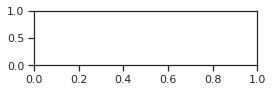

In [109]:
data_pubchem = pd.concat([df_pubchem_X_final,df_pubchem_Y_final], axis=1)
data_pubchem

In [110]:
data_pubchem.to_csv('Final_pubchem_for ML.csv', sep=',' ,index=False)